# Assignment 1/B
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.20 ==> 5
  * 2020.10.21 - 2020.10.27 ==> 4
  * 2020.10.28 - 2020.11.03 ==> 3
  * 2020.11.04 - 2020.11.10 ==> 2
  * 2020.11.11 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`.

### Description
In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images. To implement such kind of models, you should take a look at the following classes and methods: `Sequential model, Funcitonal API, MaxPooling2D, Conv2DTranspose`.


## Prepare dataset

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [1]:
# Simpsons characters
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1108      0 --:--:-- --:--:-- --:--:--  1108
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1104M    0 1104M    0     0  3047k      0 --:--:--  0:06:11 --:--:-- 2720kM    0     0  2369k      0 --:--:--  0:01:03 --:--:-- 3484k 160M    0     0  2467k      0 --:--:--  0:01:06 --:--:-- 4629k0     0  2679k      0 --:--:--  0:01:19 --:--:-- 4233k0  223M    0     0  2744k      0 --:--:--  0:01:23 --:--:-- 4117k     0  3277k      0 --:--:--  0:03:04 --:--:-- 2641k  0  3267k      0 --:--:--  0:03:26 --:--:-- 4044k 3212k      0 --:--:--  0:03:40 --:--:-- 2751k8k      0 --:--:--  0:03:43 --:--:-- 3158k     0 --:--:--  0:04:55 --:--:-- 2799k


In [2]:
!unzip simpsons_dataset.zip

Archive:  simpsons_dataset.zip
  inflating: annotation.txt          
  inflating: characters_illustration.png  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_0.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_1.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_10.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_11.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_12.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_13.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_14.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_15.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_16.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/abraham_gram

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_14.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_15.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_16.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_17.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_18.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_19.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_2.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_20.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_21.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_22.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/charles_mont

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_3.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_30.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_31.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_4.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_40.jpg  
  infl

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_3.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_30.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_31.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_35.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/homer_simpson_4.jpg  
  inflating: kaggl

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_31.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_35.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_4.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_40.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/krusty_

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_30.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_31.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_35.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_4.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_40.jpg  
  inflating: kaggle_simpson_t

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_30.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_31.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_35.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_4.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/mayor_quimby_40.jpg  
  inflating: kaggle_simpson_t

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_32.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_33.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_34.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_35.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_36.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_37.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_38.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_39.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_4.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_40.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_41.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/moe_szyslak_42.jpg  
  inflating: kaggle_simpson_testset/kaggl

  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_48.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_49.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_5.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_6.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_7.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_8.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/nelson_muntz_9.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner_0.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner_1.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner_10.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner_11.jpg  
  inflating: kaggle_simpson_testset/kaggle_simpson_testset/principal_skinner_12.jpg  
  inflatin

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0046.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0047.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0048.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0049.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0050.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0051.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0052.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0053.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0054.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0055.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0056.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0175.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0176.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0177.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0178.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0179.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0180.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0181.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0182.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0183.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0184.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0185.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0186.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0187.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0188.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0321.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0322.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0323.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0324.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0325.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0326.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0327.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0328.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0329.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0330.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0331.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0332.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0333.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0334.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0487.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0488.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0489.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0490.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0491.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0492.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0493.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0494.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0495.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0496.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0497.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0498.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0499.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0500.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0620.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0621.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0622.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0623.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0624.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0625.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0626.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0627.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0628.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0629.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0630.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0631.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0632.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0633.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0742.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0743.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0744.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0745.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0746.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0747.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0748.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0749.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0750.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0751.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0752.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0753.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0754.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0755.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0892.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0893.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0894.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0895.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0896.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0897.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0898.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0899.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0900.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0901.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0902.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0903.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0904.jpg  
  inflating: simpsons_dataset/abraham_grampa_simpson/pic_0905.jpg  
  inflating: simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0104.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0105.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0106.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0107.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0108.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0109.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0110.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0111.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0112.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0113.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0114.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0115.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0116.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0117.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0247.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0248.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0249.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0250.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0251.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0252.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0253.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0254.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0255.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0256.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0257.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0258.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0259.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0260.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0388.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0389.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0390.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0391.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0392.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0393.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0394.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0395.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0396.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0397.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0398.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0399.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0400.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0401.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0548.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0549.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0550.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0551.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0552.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0553.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0554.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0555.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0556.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0557.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0558.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0559.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0560.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapetilon/pic_0561.jpg  
  inflating: simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/barney_gumble/pic_0101.jpg  
  inflating: simpsons_dataset/barney_gumble/pic_0102.jpg  
  inflating: simpsons_dataset/barney_gumble/pic_0103.jpg  
  inflating: simpsons_dataset/barney_gumble/pic_0104.jpg  
  inflating: simpsons_dataset/barney_gumble/pic_0105.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0000.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0001.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0002.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0003.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0004.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0005.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0006.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0007.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0008.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0009.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0010.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0011.jpg  
  inflati

  inflating: simpsons_dataset/bart_simpson/pic_0155.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0156.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0157.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0158.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0159.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0160.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0161.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0162.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0163.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0164.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0165.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0166.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0167.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0168.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0169.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0170.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0171.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_0301.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0302.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0303.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0304.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0305.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0306.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0307.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0308.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0309.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0310.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0311.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0312.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0313.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0314.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0315.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0316.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0317.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_0459.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0460.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0461.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0462.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0463.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0464.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0465.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0466.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0467.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0468.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0469.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0470.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0471.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0472.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0473.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0474.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0475.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_0620.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0621.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0622.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0623.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0624.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0625.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0626.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0627.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0628.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0629.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0630.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0631.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0632.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0633.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0634.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0635.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0636.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_0772.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0773.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0774.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0775.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0776.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0777.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0778.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0779.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0780.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0781.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0782.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0783.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0784.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0785.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0786.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0787.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0788.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_0930.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0931.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0932.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0933.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0934.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0935.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0936.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0937.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0938.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0939.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0940.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0941.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0942.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0943.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0944.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0945.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_0946.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_1077.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1078.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1079.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1080.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1081.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1082.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1083.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1084.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1085.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1086.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1087.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1088.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1089.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1090.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1091.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1092.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1093.jpg  
  inflating: s

  inflating: simpsons_dataset/bart_simpson/pic_1240.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1241.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1242.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1243.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1244.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1245.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1246.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1247.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1248.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1249.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1250.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1251.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1252.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1253.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1254.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1255.jpg  
  inflating: simpsons_dataset/bart_simpson/pic_1256.jpg  
  inflating: s

  inflating: simpsons_dataset/carl_carlson/pic_0049.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0050.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0051.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0052.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0053.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0054.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0055.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0056.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0057.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0058.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0059.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0060.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0061.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0062.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0063.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0064.jpg  
  inflating: simpsons_dataset/carl_carlson/pic_0065.jpg  
  inflating: s

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0150.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0151.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0152.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0153.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0154.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0155.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0156.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0157.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0158.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0159.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0160.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0161.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0162.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0163.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0299.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0300.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0301.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0302.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0303.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0304.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0305.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0306.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0307.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0308.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0309.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0310.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0311.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0312.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0453.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0454.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0455.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0456.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0457.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0458.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0459.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0460.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0461.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0462.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0463.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0464.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0465.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0466.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0603.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0604.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0605.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0606.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0607.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0608.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0609.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0610.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0611.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0612.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0613.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0614.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0615.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0616.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0774.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0775.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0776.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0777.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0778.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0779.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0780.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0781.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0782.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0783.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0784.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0785.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0786.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0787.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_0919.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0920.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0921.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0922.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0923.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0924.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0925.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0926.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0927.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0928.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0929.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0930.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0931.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_0932.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_1053.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1054.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1055.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1056.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1057.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1058.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1059.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1060.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1061.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1062.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1063.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1064.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1065.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1066.jpg  
  inflating: simpson

  inflating: simpsons_dataset/charles_montgomery_burns/pic_1192.jpg  
  inflating: simpsons_dataset/charles_montgomery_burns/pic_1193.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0000.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0001.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0002.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0003.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0004.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0005.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0006.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0007.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0008.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0009.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0010.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0011.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0012.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0013.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0

  inflating: simpsons_dataset/chief_wiggum/pic_0163.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0164.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0165.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0166.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0167.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0168.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0169.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0170.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0171.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0172.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0173.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0174.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0175.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0176.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0177.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0178.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0179.jpg  
  inflating: s

  inflating: simpsons_dataset/chief_wiggum/pic_0313.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0314.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0315.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0316.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0317.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0318.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0319.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0320.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0321.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0322.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0323.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0324.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0325.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0326.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0327.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0328.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0329.jpg  
  inflating: s

  inflating: simpsons_dataset/chief_wiggum/pic_0462.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0463.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0464.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0465.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0466.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0467.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0468.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0469.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0470.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0471.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0472.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0473.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0474.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0475.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0476.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0477.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0478.jpg  
  inflating: s

  inflating: simpsons_dataset/chief_wiggum/pic_0610.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0611.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0612.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0613.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0614.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0615.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0616.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0617.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0618.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0619.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0620.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0621.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0622.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0623.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0624.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0625.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0626.jpg  
  inflating: s

  inflating: simpsons_dataset/chief_wiggum/pic_0824.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0825.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0826.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0827.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0828.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0829.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0830.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0831.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0832.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0833.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0834.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0835.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0836.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0837.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0838.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0839.jpg  
  inflating: simpsons_dataset/chief_wiggum/pic_0840.jpg  
  inflating: s

  inflating: simpsons_dataset/comic_book_guy/pic_0000.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0001.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0002.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0003.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0004.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0005.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0006.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0007.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0008.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0009.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0010.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0011.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0012.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0013.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0014.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0015.jpg  
  inflating: simpsons_dataset/comic_book

  inflating: simpsons_dataset/comic_book_guy/pic_0162.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0163.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0164.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0165.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0166.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0167.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0168.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0169.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0170.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0171.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0172.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0173.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0174.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0175.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0176.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0177.jpg  
  inflating: simpsons_dataset/comic_book

  inflating: simpsons_dataset/comic_book_guy/pic_0318.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0319.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0320.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0321.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0322.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0323.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0324.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0325.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0326.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0327.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0328.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0329.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0330.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0331.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0332.jpg  
  inflating: simpsons_dataset/comic_book_guy/pic_0333.jpg  
  inflating: simpsons_dataset/comic_book

  inflating: simpsons_dataset/edna_krabappel/pic_0015.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0016.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0017.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0019.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0020.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0021.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0022.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0023.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0024.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0025.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0026.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0027.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0028.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0029.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0030.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0031.jpg  
  inflating: simpsons_dataset/edna_kraba

  inflating: simpsons_dataset/edna_krabappel/pic_0178.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0179.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0180.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0181.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0182.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0183.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0184.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0185.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0186.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0187.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0188.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0189.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0190.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0191.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0192.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0193.jpg  
  inflating: simpsons_dataset/edna_kraba

  inflating: simpsons_dataset/edna_krabappel/pic_0334.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0335.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0336.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0337.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0338.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0339.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0340.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0341.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0342.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0343.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0344.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0345.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0346.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0347.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0348.jpg  
  inflating: simpsons_dataset/edna_krabappel/pic_0349.jpg  
  inflating: simpsons_dataset/edna_kraba

  inflating: simpsons_dataset/gil/pic_0001.jpg  
  inflating: simpsons_dataset/gil/pic_0002.jpg  
  inflating: simpsons_dataset/gil/pic_0003.jpg  
  inflating: simpsons_dataset/gil/pic_0004.jpg  
  inflating: simpsons_dataset/gil/pic_0005.jpg  
  inflating: simpsons_dataset/gil/pic_0006.jpg  
  inflating: simpsons_dataset/gil/pic_0007.jpg  
  inflating: simpsons_dataset/gil/pic_0008.jpg  
  inflating: simpsons_dataset/gil/pic_0009.jpg  
  inflating: simpsons_dataset/gil/pic_0010.jpg  
  inflating: simpsons_dataset/gil/pic_0011.jpg  
  inflating: simpsons_dataset/gil/pic_0012.jpg  
  inflating: simpsons_dataset/gil/pic_0013.jpg  
  inflating: simpsons_dataset/gil/pic_0014.jpg  
  inflating: simpsons_dataset/gil/pic_0015.jpg  
  inflating: simpsons_dataset/gil/pic_0016.jpg  
  inflating: simpsons_dataset/gil/pic_0017.jpg  
  inflating: simpsons_dataset/gil/pic_0018.jpg  
  inflating: simpsons_dataset/gil/pic_0019.jpg  
  inflating: simpsons_dataset/gil/pic_0020.jpg  
  inflating: simpson

  inflating: simpsons_dataset/homer_simpson/pic_0033.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0034.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0035.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0036.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0037.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0038.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0039.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0040.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0042.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0046.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0047.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0048.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0049.jpg

  inflating: simpsons_dataset/homer_simpson/pic_0234.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0235.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0236.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0237.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0238.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0239.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0240.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0241.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0242.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0243.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0244.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0245.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0246.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0247.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0248.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0249.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0250.jpg

  inflating: simpsons_dataset/homer_simpson/pic_0380.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0381.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0382.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0383.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0384.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0385.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0386.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0387.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0388.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0389.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0390.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0391.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0392.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0393.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0394.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0395.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0396.jpg

  inflating: simpsons_dataset/homer_simpson/pic_0529.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0530.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0531.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0532.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0533.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0534.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0535.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0536.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0537.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0538.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0539.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0540.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0541.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0542.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0543.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0544.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0545.jpg

  inflating: simpsons_dataset/homer_simpson/pic_0698.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0699.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0700.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0701.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0702.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0703.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0704.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0705.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0706.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0707.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0708.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0709.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0710.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0711.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0712.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0713.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0714.jpg

  inflating: simpsons_dataset/homer_simpson/pic_0886.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0887.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0888.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0889.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0890.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0891.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0892.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0893.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0894.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0895.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0896.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0897.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0898.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0899.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0900.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0901.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_0902.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1093.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1094.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1095.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1096.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1097.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1098.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1099.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1100.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1101.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1102.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1103.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1104.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1105.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1106.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1107.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1108.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1109.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1237.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1238.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1239.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1240.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1241.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1242.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1243.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1244.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1245.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1246.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1247.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1248.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1249.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1250.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1251.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1252.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1253.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1437.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1438.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1439.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1440.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1441.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1442.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1443.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1444.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1445.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1446.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1447.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1448.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1449.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1450.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1451.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1452.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1453.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1614.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1615.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1616.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1617.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1618.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1619.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1620.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1621.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1622.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1623.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1624.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1625.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1626.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1627.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1628.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1629.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1630.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1754.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1755.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1756.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1757.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1758.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1759.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1760.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1761.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1762.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1763.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1764.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1765.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1766.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1767.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1768.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1769.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1770.jpg

  inflating: simpsons_dataset/homer_simpson/pic_1938.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1939.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1940.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1941.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1942.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1943.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1944.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1945.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1946.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1947.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1948.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1949.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1950.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1951.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1952.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1953.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_1954.jpg

  inflating: simpsons_dataset/homer_simpson/pic_2116.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2117.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2118.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2119.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2120.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2121.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2122.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2123.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2124.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2125.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2126.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2127.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2128.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2129.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2130.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2131.jpg  
  inflating: simpsons_dataset/homer_simpson/pic_2132.jpg

  inflating: simpsons_dataset/kent_brockman/pic_0033.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0034.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0035.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0036.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0037.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0038.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0039.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0040.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0041.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0042.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0043.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0044.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0045.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0046.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0047.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0048.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0049.jpg

  inflating: simpsons_dataset/kent_brockman/pic_0218.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0219.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0220.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0221.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0222.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0223.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0224.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0225.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0226.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0227.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0228.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0229.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0230.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0231.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0232.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0233.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0234.jpg

  inflating: simpsons_dataset/kent_brockman/pic_0365.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0366.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0367.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0368.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0369.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0370.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0371.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0372.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0373.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0374.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0375.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0376.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0377.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0378.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0379.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0380.jpg  
  inflating: simpsons_dataset/kent_brockman/pic_0381.jpg

  inflating: simpsons_dataset/krusty_the_clown/pic_0014.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0015.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0018.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0019.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0020.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0021.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0022.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0023.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0024.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0025.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0026.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0027.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0028.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0029.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0030.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0031.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0156.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0157.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0158.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0159.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0160.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0161.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0162.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0163.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0164.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0165.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0166.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0167.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0168.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0169.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0170.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0171.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0293.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0294.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0295.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0296.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0297.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0298.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0299.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0300.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0301.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0302.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0303.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0304.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0305.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0306.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0307.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0308.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0438.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0439.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0440.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0441.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0442.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0443.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0444.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0445.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0446.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0447.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0448.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0449.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0450.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0451.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0452.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0453.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0601.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0602.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0603.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0604.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0605.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0606.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0607.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0608.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0609.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0610.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0611.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0612.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0613.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0614.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0615.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0616.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0765.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0766.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0767.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0768.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0769.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0770.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0771.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0772.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0773.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0774.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0775.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0776.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0777.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0778.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0779.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0780.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_0933.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0934.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0935.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0936.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0937.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0938.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0939.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0940.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0941.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0942.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0943.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0944.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0945.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0946.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0947.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_0948.jpg  
  inflat

  inflating: simpsons_dataset/krusty_the_clown/pic_1128.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1129.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1130.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1131.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1132.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1133.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1134.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1135.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1136.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1137.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1138.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1139.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1140.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1141.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1142.jpg  
  inflating: simpsons_dataset/krusty_the_clown/pic_1143.jpg  
  inflat

  inflating: simpsons_dataset/lenny_leonard/pic_0191.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0192.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0193.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0194.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0195.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0196.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0197.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0198.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0199.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0200.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0201.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0202.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0203.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0204.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0205.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0206.jpg  
  inflating: simpsons_dataset/lenny_leonard/pic_0207.jpg

  inflating: simpsons_dataset/lisa_simpson/pic_0037.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0038.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0039.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0040.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0042.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0046.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0047.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0048.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0049.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0050.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0051.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0052.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0053.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_0226.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0227.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0228.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0229.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0230.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0231.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0232.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0233.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0234.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0235.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0236.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0237.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0238.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0239.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0240.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0241.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0242.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_0408.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0409.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0410.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0411.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0412.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0413.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0414.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0415.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0416.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0417.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0418.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0419.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0420.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0421.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0422.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0423.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0424.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_0594.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0595.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0596.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0597.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0598.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0599.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0600.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0601.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0602.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0603.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0604.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0605.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0606.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0607.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0608.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0609.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0610.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_0779.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0780.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0781.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0782.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0783.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0784.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0785.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0786.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0787.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0788.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0789.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0790.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0791.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0792.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0793.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0794.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0795.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_0983.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0984.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0985.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0986.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0987.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0988.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0989.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0990.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0991.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0992.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0993.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0994.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0995.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0996.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0997.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0998.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_0999.jpg  
  inflating: s

  inflating: simpsons_dataset/lisa_simpson/pic_1180.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1181.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1182.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1183.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1184.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1185.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1186.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1187.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1188.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1189.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1190.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1191.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1192.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1193.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1194.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1195.jpg  
  inflating: simpsons_dataset/lisa_simpson/pic_1196.jpg  
  inflating: s

  inflating: simpsons_dataset/maggie_simpson/pic_0030.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0031.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0032.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0033.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0034.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0035.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0036.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0037.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0038.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0039.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0040.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0042.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/maggie_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/maggie_sim

  inflating: simpsons_dataset/marge_simpson/pic_0101.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0102.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0103.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0104.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0105.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0106.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0107.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0108.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0109.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0110.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0111.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0112.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0113.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0114.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0115.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0116.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0117.jpg

  inflating: simpsons_dataset/marge_simpson/pic_0280.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0281.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0282.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0283.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0284.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0285.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0286.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0287.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0288.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0289.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0290.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0291.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0292.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0293.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0294.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0295.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0296.jpg

  inflating: simpsons_dataset/marge_simpson/pic_0471.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0472.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0473.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0474.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0475.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0476.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0477.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0478.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0479.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0480.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0481.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0482.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0483.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0484.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0485.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0486.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0487.jpg

  inflating: simpsons_dataset/marge_simpson/pic_0667.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0668.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0669.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0670.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0671.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0672.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0673.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0674.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0675.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0676.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0677.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0678.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0679.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0680.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0681.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0682.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0683.jpg

  inflating: simpsons_dataset/marge_simpson/pic_0851.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0852.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0853.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0854.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0855.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0856.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0857.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0858.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0859.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0860.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0861.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0862.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0863.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0864.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0865.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0866.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_0867.jpg

  inflating: simpsons_dataset/marge_simpson/pic_1048.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1049.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1050.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1051.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1052.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1053.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1054.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1055.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1056.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1057.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1058.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1059.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1060.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1061.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1062.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1063.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1064.jpg

  inflating: simpsons_dataset/marge_simpson/pic_1192.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1193.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1194.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1195.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1196.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1197.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1198.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1199.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1200.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1201.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1202.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1203.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1204.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1205.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1206.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1207.jpg  
  inflating: simpsons_dataset/marge_simpson/pic_1208.jpg

  inflating: simpsons_dataset/mayor_quimby/pic_0025.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0026.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0027.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0028.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0029.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0030.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0031.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0032.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0033.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0034.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0035.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0036.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0037.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0038.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0039.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0040.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0041.jpg  
  inflating: s

  inflating: simpsons_dataset/mayor_quimby/pic_0226.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0227.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0228.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0229.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0230.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0231.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0232.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0233.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0234.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0235.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0236.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0237.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0238.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0239.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0240.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0241.jpg  
  inflating: simpsons_dataset/mayor_quimby/pic_0242.jpg  
  inflating: s

  inflating: simpsons_dataset/milhouse_van_houten/pic_0116.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0117.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0118.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0119.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0120.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0121.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0122.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0123.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0124.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0125.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0126.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0127.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0128.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0129.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0130.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0262.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0263.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0264.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0265.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0266.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0267.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0268.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0269.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0270.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0271.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0272.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0273.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0274.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0275.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0276.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0417.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0418.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0419.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0420.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0421.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0422.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0423.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0424.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0425.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0426.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0427.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0428.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0429.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0430.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0431.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0550.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0551.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0552.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0553.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0554.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0555.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0556.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0557.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0558.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0559.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0560.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0561.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0562.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0563.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0564.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0687.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0688.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0689.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0690.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0691.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0692.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0693.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0694.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0695.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0696.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0697.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0698.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0699.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0700.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0701.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0814.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0815.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0816.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0817.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0818.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0819.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0820.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0821.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0822.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0823.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0824.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0825.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0826.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0827.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0828.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/milhouse_van_houten/pic_0960.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0961.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0962.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0963.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0964.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0965.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0966.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0967.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0968.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0969.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0970.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0971.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0972.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0973.jpg  
  inflating: simpsons_dataset/milhouse_van_houten/pic_0974.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/miss_hoover/pic_0009.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0010.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0011.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0012.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0013.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0014.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0015.jpg  
  inflating: simpsons_dataset/miss_hoover/pic_0016.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0000.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0001.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0002.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0003.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0004.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0005.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0006.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0007.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0008.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_0140.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0141.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0142.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0143.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0144.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0145.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0146.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0147.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0148.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0149.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0150.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0151.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0152.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0153.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0154.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0155.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0156.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_0352.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0353.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0354.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0355.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0356.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0357.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0358.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0359.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0360.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0361.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0362.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0363.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0364.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0365.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0366.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0367.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0368.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_0499.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0500.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0501.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0502.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0503.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0504.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0505.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0506.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0507.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0508.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0509.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0510.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0511.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0512.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0513.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0514.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0515.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_0654.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0655.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0656.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0657.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0658.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0659.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0660.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0661.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0662.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0663.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0664.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0665.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0666.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0667.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0668.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0669.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0670.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_0848.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0849.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0850.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0851.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0852.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0853.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0854.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0855.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0856.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0857.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0858.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0859.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0860.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0861.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0862.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0863.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_0864.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_1047.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1048.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1049.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1050.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1051.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1052.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1053.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1054.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1055.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1056.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1057.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1058.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1059.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1060.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1061.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1062.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1063.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_1194.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1195.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1196.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1197.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1198.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1199.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1200.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1201.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1202.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1203.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1204.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1205.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1206.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1207.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1208.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1209.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1210.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/moe_szyslak/pic_1385.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1386.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1387.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1388.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1389.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1390.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1391.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1392.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1393.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1394.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1395.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1396.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1397.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1398.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1399.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1400.jpg  
  inflating: simpsons_dataset/moe_szyslak/pic_1401.jpg  
  inflating: simpsons_dataset/m

  inflating: simpsons_dataset/ned_flanders/pic_0143.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0144.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0145.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0146.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0147.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0148.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0149.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0150.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0151.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0152.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0153.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0154.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0155.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0156.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0157.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0158.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0159.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_0342.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0343.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0344.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0345.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0346.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0347.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0348.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0349.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0350.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0351.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0352.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0353.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0354.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0355.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0356.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0357.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0358.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_0486.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0487.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0488.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0489.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0490.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0491.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0492.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0493.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0494.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0495.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0496.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0497.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0498.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0499.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0500.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0501.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0502.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_0660.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0661.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0662.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0663.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0664.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0665.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0666.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0667.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0668.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0669.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0670.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0671.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0672.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0673.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0674.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0675.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0676.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_0861.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0862.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0863.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0864.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0865.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0866.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0867.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0868.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0869.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0870.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0871.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0872.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0873.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0874.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0875.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0876.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_0877.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_1071.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1072.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1073.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1074.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1075.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1076.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1077.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1078.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1079.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1080.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1081.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1082.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1083.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1084.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1085.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1086.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1087.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_1276.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1277.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1278.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1279.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1280.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1281.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1282.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1283.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1284.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1285.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1286.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1287.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1288.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1289.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1290.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1291.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1292.jpg  
  inflating: s

  inflating: simpsons_dataset/ned_flanders/pic_1428.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1429.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1430.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1431.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1432.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1433.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1434.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1435.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1436.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1437.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1438.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1439.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1440.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1441.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1442.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1443.jpg  
  inflating: simpsons_dataset/ned_flanders/pic_1444.jpg  
  inflating: s

  inflating: simpsons_dataset/nelson_muntz/pic_0162.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0163.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0164.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0165.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0166.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0167.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0168.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0169.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0170.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0171.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0172.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0173.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0174.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0175.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0176.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0177.jpg  
  inflating: simpsons_dataset/nelson_muntz/pic_0178.jpg  
  inflating: s

  inflating: simpsons_dataset/otto_mann/pic_0009.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0010.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0011.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0012.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0013.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0014.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0015.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0016.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0017.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0018.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0019.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0020.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0021.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0022.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0023.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0024.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0025.jpg  
  inflating: simpsons_dataset/otto_mann/pic_0026.jpg  
  inflatin

  inflating: simpsons_dataset/principal_skinner/pic_0085.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0086.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0087.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0088.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0089.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0090.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0091.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0092.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0093.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0094.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0095.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0096.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0097.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0098.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0099.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_010

  inflating: simpsons_dataset/principal_skinner/pic_0244.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0245.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0246.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0247.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0248.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0249.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0250.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0251.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0252.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0253.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0254.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0255.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0256.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0257.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0258.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_025

  inflating: simpsons_dataset/principal_skinner/pic_0405.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0406.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0407.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0408.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0409.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0410.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0411.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0412.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0413.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0414.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0415.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0416.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0417.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0418.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0419.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_042

  inflating: simpsons_dataset/principal_skinner/pic_0540.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0541.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0542.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0543.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0544.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0545.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0546.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0547.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0548.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0549.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0550.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0551.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0552.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0553.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0554.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_055

  inflating: simpsons_dataset/principal_skinner/pic_0674.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0675.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0676.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0677.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0678.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0679.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0680.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0681.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0682.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0683.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0684.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0685.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0686.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0687.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0688.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_068

  inflating: simpsons_dataset/principal_skinner/pic_0863.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0864.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0865.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0866.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0867.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0868.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0869.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0870.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0871.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0872.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0873.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0874.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0875.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0876.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0877.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_087

  inflating: simpsons_dataset/principal_skinner/pic_0994.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0995.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0996.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0997.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0998.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_0999.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1000.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1001.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1002.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1003.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1004.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1005.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1006.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1007.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1008.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_100

  inflating: simpsons_dataset/principal_skinner/pic_1154.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1155.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1156.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1157.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1158.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1159.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1160.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1161.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1162.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1163.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1164.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1165.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1166.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1167.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_1168.jpg  
  inflating: simpsons_dataset/principal_skinner/pic_116

  inflating: simpsons_dataset/ralph_wiggum/pic_0004.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0005.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0006.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0007.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0008.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0009.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0010.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0011.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0012.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0013.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0014.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0015.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0016.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0017.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0018.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0019.jpg  
  inflating: simpsons_dataset/ralph_wiggum/pic_0020.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0004.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0005.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0006.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0007.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0008.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0009.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0010.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0011.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0012.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0013.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0014.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0015.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0016.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0017.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0018.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0019.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0020.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0149.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0150.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0151.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0152.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0153.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0154.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0155.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0156.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0157.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0158.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0159.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0160.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0161.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0162.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0163.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0164.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0165.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0347.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0348.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0349.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0350.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0351.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0352.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0353.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0354.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0355.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0356.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0357.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0358.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0359.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0360.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0361.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0362.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0363.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0519.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0520.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0521.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0522.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0523.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0524.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0525.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0526.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0527.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0528.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0529.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0530.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0531.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0532.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0533.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0534.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0535.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0661.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0662.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0663.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0664.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0665.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0666.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0667.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0668.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0669.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0670.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0671.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0672.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0673.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0674.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0675.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0676.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0677.jpg  
  inflating: s

  inflating: simpsons_dataset/sideshow_bob/pic_0805.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0806.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0807.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0808.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0809.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0810.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0811.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0812.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0813.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0814.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0815.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0816.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0817.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0818.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0819.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0820.jpg  
  inflating: simpsons_dataset/sideshow_bob/pic_0821.jpg  
  inflating: s

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0047.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0183.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0184.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0185.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0186.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0187.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0188.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0189.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0304.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0305.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0306.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0307.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0308.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0309.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0310.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0311.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0312.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0313.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0314.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0450.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0451.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0452.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0453.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0454.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0455.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0456.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0457.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0458.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0459.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0460.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0590.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0591.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0592.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0593.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0594.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0595.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0596.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0597.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0598.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0599.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0600.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0719.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0720.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0721.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0722.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0723.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0724.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0725.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0726.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0727.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0728.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0729.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0853.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0854.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0855.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0856.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0857.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0858.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0859.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0860.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0861.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0862.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_simpson/pic_0863.jpg  
  inflating: simpsons_dataset/simpsons_dataset/abraham_grampa_sim

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0020.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0021.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0022.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0023.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0024.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0025.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0026.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0027.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0146.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0147.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0148.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0149.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0150.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0151.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0152.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0153.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0154.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0283.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0284.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0285.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0286.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0380.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0381.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0382.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0383.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0384.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0385.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0386.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0387.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0388.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0389.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0390.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0484.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0485.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0486.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0487.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0488.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0489.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0490.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0491.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0492.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0493.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0494.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0592.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0593.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0594.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0595.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0596.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0597.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0598.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0599.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0600.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0601.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0602.jpg  
  inflating: simpsons_dataset/simpsons_dataset/apu_nahasapeemapet

  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0076.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0077.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0078.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0079.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0080.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0081.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0082.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0083.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0084.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0085.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0086.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0087.jpg  
  inflating: simpsons_dataset/simpsons_dataset/barney_gumble/pic_0088.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0088.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0089.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0090.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0091.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0092.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0093.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0094.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0095.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0096.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0097.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0098.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0099.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0100.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0232.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0233.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0234.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0235.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0236.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0237.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0238.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0239.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0240.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0241.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0242.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0243.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0244.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0367.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0368.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0369.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0370.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0371.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0372.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0373.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0374.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0375.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0376.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0377.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0378.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0379.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0502.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0503.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0504.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0505.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0506.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0507.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0508.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0509.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0510.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0511.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0512.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0513.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0514.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0626.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0627.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0628.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0629.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0630.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0631.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0632.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0633.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0634.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0635.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0636.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0637.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0638.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0752.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0753.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0754.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0755.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0756.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0757.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0758.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0759.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0760.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0761.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0762.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0763.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0764.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0909.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0910.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0911.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0912.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0913.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0914.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0915.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0916.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0917.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0918.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0919.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0920.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_0921.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1026.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1027.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1032.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1033.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1038.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1167.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1168.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1169.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1170.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1171.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1172.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1173.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1174.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1175.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1176.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1177.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1178.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1179.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1308.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1309.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1310.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1311.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1312.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1313.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1314.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1315.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1316.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1317.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1318.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1319.jpg  
  inflating: simpsons_dataset/simpsons_dataset/bart_simpson/pic_1320.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/carl_carlson/pic_0097.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0000.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0001.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0002.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0003.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0004.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0005.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0006.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0007.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0008.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0009.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0141.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0142.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0143.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0144.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0145.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0146.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0147.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0148.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0149.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0150.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0151.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0265.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0266.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0267.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0268.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0269.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0270.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0275.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0404.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0405.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0406.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0407.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0408.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0409.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0410.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0411.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0412.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0413.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0414.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0551.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0552.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0553.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0554.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0555.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0556.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0557.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0558.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0559.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0560.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0561.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0665.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0666.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0667.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0668.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0669.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0670.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0671.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0672.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0673.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0674.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0675.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0764.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0765.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0766.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0767.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0768.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0769.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0770.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0901.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0902.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0903.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0904.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0905.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0906.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0907.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0908.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0909.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0910.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0911.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1032.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1033.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1038.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1154.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1162.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1163.jpg  
  inflating: simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1164.jpg  
  inflating: simpsons_dataset/simpsons_data

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0095.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0096.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0097.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0098.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0099.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0100.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0101.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0102.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0103.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0104.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0105.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0106.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0107.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0232.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0233.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0234.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0235.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0236.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0237.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0238.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0239.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0240.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0241.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0242.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0243.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0244.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0369.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0370.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0371.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0372.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0373.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0374.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0375.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0376.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0377.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0378.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0379.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0380.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0381.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0493.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0494.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0495.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0496.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0497.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0498.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0499.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0500.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0501.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0502.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0503.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0504.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0505.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0624.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0625.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0626.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0627.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0628.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0629.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0630.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0631.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0632.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0633.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0634.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0635.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0636.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0764.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0765.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0766.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0767.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0768.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0769.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0770.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0776.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0897.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0898.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0899.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0900.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0901.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0902.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0903.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0904.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0905.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0906.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0907.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0908.jpg  
  inflating: simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0909.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/cletus_spuckler/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/cletus_spuckler/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/cletus_spuckler/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/cletus_spuckler/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0000.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0001.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0002.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0003.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0004.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0005.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0006.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0007.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0008.j

  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0129.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0130.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0131.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0132.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0133.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0134.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0135.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0136.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0137.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0138.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0139.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0140.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0141.jpg  

  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0258.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0259.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0260.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0261.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0262.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0263.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0264.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0265.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0266.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0267.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0268.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0269.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0270.jpg  

  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0394.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0395.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0396.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0397.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0398.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0399.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0400.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0401.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0402.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0403.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0404.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0405.jpg  
  inflating: simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0406.jpg  

  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0084.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0085.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0086.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0087.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0088.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0089.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0090.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0091.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0092.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0093.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0094.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0095.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0096.jpg  

  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0234.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0235.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0236.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0237.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0238.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0239.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0240.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0241.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0242.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0243.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0244.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0245.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0246.jpg  

  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0406.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0407.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0408.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0409.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0410.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0411.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0412.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0413.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0414.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0415.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0416.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0417.jpg  
  inflating: simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0418.jpg  

  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0032.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0033.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0038.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0039.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0040.jpg  
  inflating: simpsons_dataset/simpsons_dataset/groundskeeper_willie/pic_0041.jpg  
  in

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0032.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0033.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0038.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0039.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0040.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0042.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0162.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0163.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0164.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0165.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0166.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0167.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0294.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0295.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0296.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0297.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0298.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0299.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0300.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0301.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0302.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0303.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0304.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0305.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0306.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0404.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0405.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0406.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0407.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0408.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0409.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0410.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0411.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0412.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0413.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0414.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0415.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0416.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0514.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0515.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0516.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0517.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0518.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0519.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0520.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0521.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0522.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0523.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0524.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0525.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0526.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0637.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0638.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0639.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0640.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0641.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0642.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0643.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0644.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0645.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0646.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0647.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0648.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0649.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0767.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0768.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0769.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0770.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0779.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0905.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0906.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0907.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0908.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0909.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0910.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0911.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0912.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0913.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0914.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0915.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0916.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_0917.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1052.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1053.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1054.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1055.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1056.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1060.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1194.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1195.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1196.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1197.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1198.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1199.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1200.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1201.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1202.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1203.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1204.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1205.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1206.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1319.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1320.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1321.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1322.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1323.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1324.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1325.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1326.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1327.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1328.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1329.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1330.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1331.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1451.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1452.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1453.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1454.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1455.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1456.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1457.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1458.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1459.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1460.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1461.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1462.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1463.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1566.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1567.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1568.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1569.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1570.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1571.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1572.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1573.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1574.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1575.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1576.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1577.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1578.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1714.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1715.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1716.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1717.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1718.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1719.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1720.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1721.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1722.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1723.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1724.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1725.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1726.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1858.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1859.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1860.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1861.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1862.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1863.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1864.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1865.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1866.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1867.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1868.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1869.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_1870.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2009.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2010.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2011.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2012.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2013.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2014.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2015.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2016.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2017.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2018.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2019.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2020.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2021.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2135.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2136.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2137.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2138.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2139.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2140.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2141.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2142.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2143.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2144.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2145.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2146.jpg  
  inflating: simpsons_dataset/simpsons_dataset/homer_simpson/pic_2147.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0020.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0021.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0022.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0023.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0024.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0025.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0026.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0027.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0032.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0150.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0151.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0152.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0153.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0154.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0162.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0283.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0284.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0285.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0286.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0287.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0394.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0395.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0396.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0397.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0398.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0399.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0400.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0401.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0402.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0403.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0404.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0405.jpg  
  inflating: simpsons_dataset/simpsons_dataset/kent_brockman/pic_0406.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0038.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0039.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0040.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0047.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0162.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0163.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0164.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0165.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0166.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0167.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0168.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0292.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0293.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0294.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0295.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0296.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0297.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0298.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0299.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0300.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0301.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0302.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0303.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0413.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0414.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0415.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0416.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0417.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0418.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0419.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0420.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0421.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0422.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0423.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0424.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0533.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0534.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0535.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0536.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0537.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0538.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0539.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0540.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0541.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0542.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0543.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0544.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0667.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0668.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0669.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0670.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0671.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0672.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0673.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0674.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0675.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0676.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0677.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0678.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0779.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0780.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0781.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0782.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0914.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0915.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0916.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0917.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0918.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0919.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0920.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0921.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0922.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0923.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0924.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0925.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1060.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_1068.jpg  
  inflating: simpsons_dataset/simpsons_dataset/krust

  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0006.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0007.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0008.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0009.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0010.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0011.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0012.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0013.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0014.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0015.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0016.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0017.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0018.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0162.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0163.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0164.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0165.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0166.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0167.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0168.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0002.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0003.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0004.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0005.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0006.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0007.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0008.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0009.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0010.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0011.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0012.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0013.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0014.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0162.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0163.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0164.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0165.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0166.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0167.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0283.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0284.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0285.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0286.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0287.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0288.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0289.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0290.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0291.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0292.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0293.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0416.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0417.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0418.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0419.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0420.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0421.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0422.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0423.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0424.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0425.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0426.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0427.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0428.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0566.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0567.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0568.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0569.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0570.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0571.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0572.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0573.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0574.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0575.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0576.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0577.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0578.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0704.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0705.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0706.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0707.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0708.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0709.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0710.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0711.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0712.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0713.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0714.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0715.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0716.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0844.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0845.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0846.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0847.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0848.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0849.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0850.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0851.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0852.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0853.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0854.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0855.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0856.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0988.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0989.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0990.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0991.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0992.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0993.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0994.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0995.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0996.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0997.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0998.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0999.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1000.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1124.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1125.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1126.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1127.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1128.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1129.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1130.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1131.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1132.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1133.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1134.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1135.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1136.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1255.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1256.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1257.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1258.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1259.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1260.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1261.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1262.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1263.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1264.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1265.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1266.jpg  
  inflating: simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1267.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0038.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0039.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0040.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/maggie_simpson/pic_0047.jpg  

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0052.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0053.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0054.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0055.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0056.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0060.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0188.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0189.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0194.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0195.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0196.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0197.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0198.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0199.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0200.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0333.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0334.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0335.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0336.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0337.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0338.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0339.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0340.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0341.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0342.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0343.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0344.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0345.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0479.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0480.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0481.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0482.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0483.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0484.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0485.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0486.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0487.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0488.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0489.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0490.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0491.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0609.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0610.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0611.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0612.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0613.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0614.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0615.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0616.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0617.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0618.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0619.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0620.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0621.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0779.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0780.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0781.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0782.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0783.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0784.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0785.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0924.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0925.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0926.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0927.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0928.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0929.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0930.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0931.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0932.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0933.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0934.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0935.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_0936.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1068.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1069.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1070.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1071.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1072.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1073.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1189.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1194.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1195.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1196.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1197.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1198.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1199.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1200.jpg  
  inflating: simpsons_dataset/simpsons_dataset/marge_simpson/pic_1201.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0047.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0052.jpg  
  inflating: simpsons_dataset/simpsons_dataset/martin_prince/pic_0053.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0083.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0084.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0085.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0086.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0087.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0088.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0089.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0090.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0091.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0092.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0093.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0094.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0095.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0205.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0206.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0207.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0208.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0209.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0210.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0211.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0212.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0213.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0214.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0215.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0216.jpg  
  inflating: simpsons_dataset/simpsons_dataset/mayor_quimby/pic_0217.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0108.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0109.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0110.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0111.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0112.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0113.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0114.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0115.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0116.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0117.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0118.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0119.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0244.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0245.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0246.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0247.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0248.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0249.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0250.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0251.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0252.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0253.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0254.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0255.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0387.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0388.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0389.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0390.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0391.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0392.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0393.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0394.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0395.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0396.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0397.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0398.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0503.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0504.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0505.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0506.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0507.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0508.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0509.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0510.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0511.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0512.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0513.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0514.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0642.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0643.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0644.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0645.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0646.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0647.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0648.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0649.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0650.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0651.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0652.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0653.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0770.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0779.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0780.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0781.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0909.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0910.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0911.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0912.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0913.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0914.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0915.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0916.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0917.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0918.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0919.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0920.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1035.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1036.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1037.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1038.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1039.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1040.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1045.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0056.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0060.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0068.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0227.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0228.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0229.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0230.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0231.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0232.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0233.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0234.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0235.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0236.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0237.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0238.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0239.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0392.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0393.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0394.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0395.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0396.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0397.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0398.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0399.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0400.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0401.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0402.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0403.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0404.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0555.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0556.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0557.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0558.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0559.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0560.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0561.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0562.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0563.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0564.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0565.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0566.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0567.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0698.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0699.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0700.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0701.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0702.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0703.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0704.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0705.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0706.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0707.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0708.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0709.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0710.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0832.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0833.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0834.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0835.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0836.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0837.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0838.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0839.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0840.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0841.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0842.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0843.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0844.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0983.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0984.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0985.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0986.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0987.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0988.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0989.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0990.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0991.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0992.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0993.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0994.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0995.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1143.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1144.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1145.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1146.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1147.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1148.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1149.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1150.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1151.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1152.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1153.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1154.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1155.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1296.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1297.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1298.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1299.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1300.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1301.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1302.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1303.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1304.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1305.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1306.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1307.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1308.jpg  
  inflating: simpsons_dataset/simpsons

  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1440.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1441.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1442.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1443.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1444.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1445.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1446.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1447.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1448.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1449.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1450.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1451.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0000.jpg  
  inflating: simpsons_dataset/simpson

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0126.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0127.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0128.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0129.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0130.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0131.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0132.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0133.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0134.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0135.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0136.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0137.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0138.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0283.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0284.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0285.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0286.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0287.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0288.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0289.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0290.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0451.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0452.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0453.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0454.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0455.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0456.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0457.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0458.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0459.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0460.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0461.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0462.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0463.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0625.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0626.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0627.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0628.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0629.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0630.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0631.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0632.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0633.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0634.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0635.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0636.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0637.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0779.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0780.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0781.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0782.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0783.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0918.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0919.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0920.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0921.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0922.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0923.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0924.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0925.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0926.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0927.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0928.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0929.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_0930.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1060.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1068.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1069.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1186.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1187.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1188.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1189.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1194.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1195.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1196.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1197.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1198.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1328.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1329.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1330.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1331.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1332.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1333.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1334.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1335.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1336.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1337.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1338.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1339.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ned_flanders/pic_1340.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0041.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0042.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0043.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0044.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0047.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0052.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0053.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0182.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0183.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0184.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0185.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0186.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0187.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0188.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0189.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0194.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0333.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0334.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0335.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0336.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0337.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0338.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0339.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0340.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0341.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0342.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0343.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0344.jpg  
  inflating: simpsons_dataset/simpsons_dataset/nelson_muntz/pic_0345.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0068.jpg  
  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0069.jpg  
  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0070.jpg  
  inflating: simpsons_dataset/simpsons_dataset/patty_bouvier/pic_0071.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0000.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0001.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0002.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0003.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0004.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0005.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0150.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0151.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0152.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0153.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0154.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0155.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0156.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0157.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0158.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0159.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0160.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0161.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0293.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0294.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0295.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0296.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0297.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0298.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0299.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0300.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0301.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0302.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0303.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0304.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0456.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0457.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0458.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0459.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0460.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0461.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0462.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0463.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0464.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0465.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0466.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0467.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0615.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0616.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0617.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0618.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0619.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0620.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0621.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0622.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0623.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0624.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0625.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0626.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0776.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0777.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0778.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0779.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0780.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0781.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0782.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0783.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0894.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0895.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0896.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0897.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0898.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0899.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0900.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0901.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0902.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0903.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0904.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_0905.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1045.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1046.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1047.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1048.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1049.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1050.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1051.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1052.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1053.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1054.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1055.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1056.jpg  
  inflating: simpsons_dataset/simpsons_d

  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1190.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1191.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1192.jpg  
  inflating: simpsons_dataset/simpsons_dataset/principal_skinner/pic_1193.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0000.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0001.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0002.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0003.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0004.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0005.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0006.jpg  
  inflating: simpsons_dataset/simpsons_dataset/professor_john_frink/pic_0007.jpg  
  inflating: sim

  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0023.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0024.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0025.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0026.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0027.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0031.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0032.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0033.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0034.jpg  
  inflating: simpsons_dataset/simpsons_dataset/ralph_wiggum/pic_0035.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0056.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0057.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0058.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0059.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0060.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/selma_bouvier/pic_0068.jpg  
  inflating:

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0104.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0105.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0106.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0107.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0108.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0109.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0110.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0111.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0112.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0113.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0114.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0115.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0116.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0236.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0237.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0238.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0239.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0240.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0241.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0242.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0243.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0244.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0245.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0246.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0247.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0248.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0378.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0379.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0380.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0381.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0382.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0383.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0384.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0385.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0386.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0387.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0388.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0389.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0390.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0497.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0498.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0499.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0500.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0501.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0502.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0503.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0504.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0505.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0506.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0507.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0508.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0509.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0616.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0617.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0618.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0619.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0620.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0621.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0622.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0623.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0624.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0625.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0626.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0627.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0628.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0764.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0765.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0766.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0767.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0768.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0769.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0770.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0771.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0772.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0773.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0774.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0775.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0776.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0019.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0020.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0021.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0022.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0023.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0024.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0025.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0026.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0027.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0028.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0029.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0030.jpg  
  inflating: simpsons_dataset/simpsons_dataset/sideshow_mel/pic_0031.jpg  
  inflating: simpsons_dat

  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0061.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0062.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0063.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0064.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0065.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0066.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0067.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0068.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0069.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0070.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0071.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/pic_0072.jpg  
  inflating: simpsons_dataset/simpsons_dataset/waylon_smithers/p

  inflating: simpsons_dataset/snake_jailbird/pic_0024.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0025.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0026.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0027.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0028.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0029.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0030.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0031.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0032.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0033.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0034.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0035.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0036.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0037.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0038.jpg  
  inflating: simpsons_dataset/snake_jailbird/pic_0039.jpg  
  inflating: simpsons_dataset/snake_jail

  inflating: simpsons_dataset/waylon_smithers/pic_0117.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0118.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0119.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0120.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0121.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0122.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0123.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0124.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0125.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0126.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0127.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0128.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0129.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0130.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0131.jpg  
  inflating: simpsons_dataset/waylon_smithers/pic_0132.jpg  
  inflating: simpsons_da

In [3]:
# Flowers Recgonition
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1120      0 --:--:-- --:--:-- --:--:--  1117
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  224M    0  224M    0     0  3507k      0 --:--:--  0:01:05 --:--:-- 3302k


In [4]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

  inflating: flowers/daisy/20329326505_a777c71cc2.jpg  
  inflating: flowers/daisy/2045022175_ad087f5f60_n.jpg  
  inflating: flowers/daisy/2057816617_18448093d0_n.jpg  
  inflating: flowers/daisy/20580471306_ab5a011b15_n.jpg  
  inflating: flowers/daisy/20619292635_9857a12d54.jpg  
  inflating: flowers/daisy/20685027271_0e7306e7c1_n.jpg  
  inflating: flowers/daisy/20703737132_179560d0fb.jpg  
  inflating: flowers/daisy/20773528301_008fcbc5a1_n.jpg  
  inflating: flowers/daisy/2077865117_9ed85191ae_n.jpg  
  inflating: flowers/daisy/2087343668_ef4fb95787_n.jpg  
  inflating: flowers/daisy/20948886919_cac7844f34_n.jpg  
  inflating: flowers/daisy/21402054779_759366efb0_n.jpg  
  inflating: flowers/daisy/21626652132_97e1318bb8_m.jpg  
  inflating: flowers/daisy/21652746_cc379e0eea_m.jpg  
  inflating: flowers/daisy/21805938544_bf6bb0e4bc.jpg  
  inflating: flowers/daisy/2213954589_c7da4b1486.jpg  
  inflating: flowers/daisy/22244161124_53e457bb66_n.jpg  
  inflating: flowers/daisy/22873

  inflating: flowers/daisy/34540176411_a35a19a8ef_n.jpg  
  inflating: flowers/daisy/34542837641_10492bf600_n.jpg  
  inflating: flowers/daisy/34543119581_1fb7e0bd7f_n.jpg  
  inflating: flowers/daisy/34546791291_eb8e15e18a_n.jpg  
  inflating: flowers/daisy/34546994701_a000b283f1_n.jpg  
  inflating: flowers/daisy/34547261352_d39bf4073a_n.jpg  
  inflating: flowers/daisy/34554334542_7d8f68a75c_n.jpg  
  inflating: flowers/daisy/34562146951_cf3d2a627c_n.jpg  
  inflating: flowers/daisy/3456403987_5bd5fa6ece_n.jpg  
  inflating: flowers/daisy/34566613262_fefbcc279a_n.jpg  
  inflating: flowers/daisy/34571214621_f655295459_n.jpg  
  inflating: flowers/daisy/34585331601_837dbe5254_n.jpg  
  inflating: flowers/daisy/34585995071_13e07140d8_n.jpg  
  inflating: flowers/daisy/34590677231_0ed33ccd55_n.jpg  
  inflating: flowers/daisy/34591991761_16fc5c9c00_n.jpg  
  inflating: flowers/daisy/34602180741_cf2f671ba5_n.jpg  
  inflating: flowers/daisy/34611565966_9de274f987_n.jpg  
  inflating: fl

  inflating: flowers/daisy/498159452_b71afd65ba.jpg  
  inflating: flowers/daisy/4993492878_11fd4f5d12.jpg  
  inflating: flowers/daisy/5014137563_d03eb0ed75_n.jpg  
  inflating: flowers/daisy/5054771689_00dd40b971_n.jpg  
  inflating: flowers/daisy/5058708968_8bdcd29e63_n.jpg  
  inflating: flowers/daisy/506018088_4f7a15a7c5_n.jpg  
  inflating: flowers/daisy/506348009_9ecff8b6ef.jpg  
  inflating: flowers/daisy/5087720485_c0914fb623.jpg  
  inflating: flowers/daisy/510844526_858b8fe4db.jpg  
  inflating: flowers/daisy/5109508979_68e3530791_m.jpg  
  inflating: flowers/daisy/5110105726_53eb7a93be_m.jpg  
  inflating: flowers/daisy/5110107234_12ddc0206b_m.jpg  
  inflating: flowers/daisy/5110109540_beed4ed162_m.jpg  
  inflating: flowers/daisy/5110110938_9da91455c4_m.jpg  
  inflating: flowers/daisy/512177035_70afc925c8.jpg  
  inflating: flowers/daisy/512477177_d9004cbcf1_n.jpg  
  inflating: flowers/daisy/5133243796_44de429de5_m.jpg  
  inflating: flowers/daisy/5135131051_102d4878ca_

  inflating: flowers/daisy/8887005939_b19e8305ee.jpg  
  inflating: flowers/daisy/8932490012_cc08e690ba_n.jpg  
  inflating: flowers/daisy/8938566373_d129e7af75.jpg  
 extracting: flowers/daisy/8964198962_6d8593b533.jpg  
  inflating: flowers/daisy/8983779970_9d3a6a3bf2_n.jpg  
  inflating: flowers/daisy/9054268881_19792c5203_n.jpg  
  inflating: flowers/daisy/9094631844_1a6abca29e.jpg  
 extracting: flowers/daisy/909609509_a05ccb8127.jpg  
  inflating: flowers/daisy/9120905231_329598304e.jpg  
  inflating: flowers/daisy/9146733107_98b15d3892_m.jpg  
  inflating: flowers/daisy/9158041313_7a6a102f7a_n.jpg  
  inflating: flowers/daisy/9161647994_e39b65cb9c_n.jpg  
  inflating: flowers/daisy/9175280426_40ecc395b8_m.jpg  
  inflating: flowers/daisy/9180706736_092d43088c.jpg  
  inflating: flowers/daisy/9204730092_a7f2182347.jpg  
  inflating: flowers/daisy/9221345475_67735dbf4f_n.jpg  
  inflating: flowers/daisy/9225336602_e6c392f941_n.jpg  
  inflating: flowers/daisy/9242705328_eee8402a8d

  inflating: flowers/dandelion/14740350060_a489d9fa06.jpg  
  inflating: flowers/dandelion/14761980161_2d6dbaa4bb_m.jpg  
  inflating: flowers/dandelion/14805304536_c321a7b061_n.jpg  
  inflating: flowers/dandelion/148180650_19a4b410db.jpg  
  inflating: flowers/dandelion/14829055_2a2e646a8f_m.jpg  
  inflating: flowers/dandelion/14845607659_1be18c5d7f.jpg  
 extracting: flowers/dandelion/148698493_5710e5f472.jpg  
  inflating: flowers/dandelion/14884028290_a1344eb446.jpg  
  inflating: flowers/dandelion/14886860069_b84665a073.jpg  
  inflating: flowers/dandelion/14886963928_d4856f1eb6_n.jpg  
  inflating: flowers/dandelion/14914603395_b271ffab56_n.jpg  
  inflating: flowers/dandelion/149782934_21adaf4a21.jpg  
  inflating: flowers/dandelion/15002906952_cab2cb29cf.jpg  
  inflating: flowers/dandelion/15005530987_e13b328047_n.jpg  
  inflating: flowers/dandelion/15123503538_8ee984abc6.jpg  
  inflating: flowers/dandelion/151385301_153eacf6b5_n.jpg  
  inflating: flowers/dandelion/151385

  inflating: flowers/dandelion/19435491090_7af558e17e.jpg  
  inflating: flowers/dandelion/19437578578_6ab1b3c984.jpg  
  inflating: flowers/dandelion/19437710780_c5f2156438.jpg  
  inflating: flowers/dandelion/19438516548_bbaf350664.jpg  
  inflating: flowers/dandelion/19440660848_c789227129_m.jpg  
  inflating: flowers/dandelion/19440910519_cb1162470e.jpg  
  inflating: flowers/dandelion/19443674130_08db1d9578_m.jpg  
  inflating: flowers/dandelion/19443726008_8c9c68efa7_m.jpg  
  inflating: flowers/dandelion/19506262462_d0945c14a6.jpg  
  inflating: flowers/dandelion/19526570282_1d1e71b0f3_m.jpg  
  inflating: flowers/dandelion/19551343814_48f764535f_m.jpg  
  inflating: flowers/dandelion/19551343954_83bb52f310_m.jpg  
  inflating: flowers/dandelion/19586799286_beb9d684b5.jpg  
  inflating: flowers/dandelion/19593576916_f5a083d7fe_n.jpg  
  inflating: flowers/dandelion/19599413676_fc9ee2640e.jpg  
  inflating: flowers/dandelion/19600096066_67dc941042.jpg  
  inflating: flowers/dande

  inflating: flowers/dandelion/33847542834_0ce330ac60_n.jpg  
  inflating: flowers/dandelion/33849982914_0f017c8e3c_n.jpg  
  inflating: flowers/dandelion/33850973214_c1b4000d9c_n.jpg  
  inflating: flowers/dandelion/33851560384_d2e7d933db_n.jpg  
  inflating: flowers/dandelion/33852722314_e8907d51f1_n.jpg  
  inflating: flowers/dandelion/33852722714_496828f866_n.jpg  
  inflating: flowers/dandelion/33856267954_b806fab0db_n.jpg  
  inflating: flowers/dandelion/33857437664_f2ddb77592_n.jpg  
  inflating: flowers/dandelion/33857574164_b0b724b567_n.jpg  
  inflating: flowers/dandelion/33859759654_be0be6f876_n.jpg  
  inflating: flowers/dandelion/33869330174_b259025135_n.jpg  
  inflating: flowers/dandelion/33873410454_04bc2167f4_n.jpg  
  inflating: flowers/dandelion/33875520194_09bff6f262_n.jpg  
  inflating: flowers/dandelion/33875654554_e5e4070fab_n.jpg  
  inflating: flowers/dandelion/33875742534_31b85d1b05_n.jpg  
  inflating: flowers/dandelion/33876197394_c7a9487a9f_n.jpg  
  inflat

  inflating: flowers/dandelion/3584414925_1e6c4b61db_n.jpg  
  inflating: flowers/dandelion/3584415133_a4122ab7b9.jpg  
  inflating: flowers/dandelion/3585220976_5acac92d1c.jpg  
  inflating: flowers/dandelion/3589816063_50f8de7b64_m.jpg  
  inflating: flowers/dandelion/3591588855_b4fd53b000.jpg  
  inflating: flowers/dandelion/3612582808_4503fa1f8b_m.jpg  
  inflating: flowers/dandelion/3662701865_3ff283a33a_n.jpg  
  inflating: flowers/dandelion/3664916269_29f07c7c7b.jpg  
  inflating: flowers/dandelion/3675486971_d4c8683b54_n.jpg  
  inflating: flowers/dandelion/3688128868_031e7b53e1_n.jpg  
  inflating: flowers/dandelion/3696596109_4c4419128a_m.jpg  
  inflating: flowers/dandelion/3730618647_5725c692c3_m.jpg  
  inflating: flowers/dandelion/3761310831_41b5eba622_n.jpg  
  inflating: flowers/dandelion/3823142577_dd5acd5ac6_n.jpg  
  inflating: flowers/dandelion/3844111216_742ea491a0.jpg  
  inflating: flowers/dandelion/3856725141_0db85f466d_n.jpg  
  inflating: flowers/dandelion/385

  inflating: flowers/dandelion/5623855601_ecaebdb8fe.jpg  
  inflating: flowers/dandelion/5628296138_9031791fab.jpg  
  inflating: flowers/dandelion/5628515159_6b437ff1e5_n.jpg  
  inflating: flowers/dandelion/5629940298_634f35125c.jpg  
  inflating: flowers/dandelion/5642429835_a0cbf1bab7_n.jpg  
  inflating: flowers/dandelion/5643666851_dc3f42399d_m.jpg  
  inflating: flowers/dandelion/5644234724_cb0917ee33_m.jpg  
  inflating: flowers/dandelion/5646743865_a8f20b60f7_n.jpg  
  inflating: flowers/dandelion/5647842237_b1c5196718_n.jpg  
 extracting: flowers/dandelion/5651310874_c8be336c2b.jpg  
  inflating: flowers/dandelion/5654859907_c2be3b0f1e_n.jpg  
  inflating: flowers/dandelion/5655177340_78fc36ce59_m.jpg  
  inflating: flowers/dandelion/5670543216_8c4cb0caa8_m.jpg  
  inflating: flowers/dandelion/5673112305_02fe19297b_n.jpg  
  inflating: flowers/dandelion/5674707921_1ffd141bab_n.jpg  
  inflating: flowers/dandelion/5675705011_82729927ca_n.jpg  
  inflating: flowers/dandelion/5

  inflating: flowers/dandelion/8376558865_19c5cd6fd6_n.jpg  
  inflating: flowers/dandelion/8475758_4c861ab268_m.jpg  
  inflating: flowers/dandelion/8475769_3dea463364_m.jpg  
  inflating: flowers/dandelion/8497389500_45636fdd14.jpg  
  inflating: flowers/dandelion/8533312924_ee09412645_n.jpg  
  inflating: flowers/dandelion/854593001_c57939125f_n.jpg  
  inflating: flowers/dandelion/8613502159_d9ea67ba63.jpg  
  inflating: flowers/dandelion/8632704230_ccafc5f7e2.jpg  
  inflating: flowers/dandelion/8642679391_0805b147cb_m.jpg  
  inflating: flowers/dandelion/8647874151_aac8db2588_m.jpg  
  inflating: flowers/dandelion/8663932737_0a603ab718_n.jpg  
  inflating: flowers/dandelion/8681169825_19a21c6bf5_m.jpg  
  inflating: flowers/dandelion/8681388520_c697dee897_n.jpg  
  inflating: flowers/dandelion/8681420404_6ae114f036_n.jpg  
  inflating: flowers/dandelion/8684108_a85764b22d_n.jpg  
  inflating: flowers/dandelion/8684925862_d736e153bf_n.jpg  
  inflating: flowers/dandelion/868772973

  inflating: flowers/rose/14381787252_e8e12e277a_n.jpg  
  inflating: flowers/rose/14406317221_1f2be67201_n.jpg  
  inflating: flowers/rose/14408977935_a397e796b8_m.jpg  
  inflating: flowers/rose/14414100710_753a36fce9.jpg  
  inflating: flowers/rose/14414117598_cf70df30de.jpg  
  inflating: flowers/rose/14414123198_24606fb32d.jpg  
 extracting: flowers/rose/1445228333_59a07e0801.jpg  
  inflating: flowers/rose/14460517566_783dbf23b8_n.jpg  
  inflating: flowers/rose/1446090416_f0cad5fde4.jpg  
  inflating: flowers/rose/1446097778_97149b8362.jpg  
  inflating: flowers/rose/14494590921_3bb1dc7b88_n.jpg  
  inflating: flowers/rose/14510185271_b5d75dd98e_n.jpg  
  inflating: flowers/rose/14573732424_1bb91e2e42_n.jpg  
  inflating: flowers/rose/145862135_ab710de93c_n.jpg  
  inflating: flowers/rose/14597445311_8acb60247e.jpg  
  inflating: flowers/rose/1461381091_aaaa663bbe_n.jpg  
  inflating: flowers/rose/14683774134_6367640585.jpg  
  inflating: flowers/rose/14687731322_5613f76353.jpg 

  inflating: flowers/rose/19823402005_2db025dd66_m.jpg  
  inflating: flowers/rose/19919867648_043cf02fc3.jpg  
  inflating: flowers/rose/19988406792_68201f76e3_n.jpg  
  inflating: flowers/rose/20409866779_ac473f55e0_m.jpg  
 extracting: flowers/rose/2053476785_c162a3e358.jpg  
 extracting: flowers/rose/2059172936_032ffc12aa.jpg  
  inflating: flowers/rose/20596941736_f2c5f496cf.jpg  
  inflating: flowers/rose/20622485918_90fc000c86_n.jpg  
  inflating: flowers/rose/2065522422_cfdd80044a_n.jpg  
  inflating: flowers/rose/20825078671_90b0389c70_m.jpg  
  inflating: flowers/rose/20851336110_b17107948d_n.jpg  
 extracting: flowers/rose/2093263381_afd51358a3.jpg  
  inflating: flowers/rose/21039447185_96d59941b2_n.jpg  
  inflating: flowers/rose/2122401867_cd86c5f114_n.jpg  
  inflating: flowers/rose/21346056089_e6f8074e5f_m.jpg  
  inflating: flowers/rose/21347496068_f4d3339607.jpg  
  inflating: flowers/rose/21413573151_e681c6a97a.jpg  
  inflating: flowers/rose/2141413229_3f0425f972_n.

  inflating: flowers/rose/4504220673_af754fcb40_n.jpg  
  inflating: flowers/rose/4504731519_9a260b6607_n.jpg  
  inflating: flowers/rose/4505921907_21c8002fde.jpg  
  inflating: flowers/rose/4553266758_09d4dbdac9_n.jpg  
  inflating: flowers/rose/4558025386_2c47314528.jpg  
  inflating: flowers/rose/4575042086_7674b76297_n.jpg  
  inflating: flowers/rose/4588034197_e300b0872a_n.jpg  
  inflating: flowers/rose/459042023_6273adc312_n.jpg  
  inflating: flowers/rose/4608559939_3487bf3b62_n.jpg  
  inflating: flowers/rose/4609166128_b7ed49b40b_m.jpg  
  inflating: flowers/rose/4609168052_3d4e1d3804_n.jpg  
  inflating: flowers/rose/4612766755_7d3f047db0_n.jpg  
  inflating: flowers/rose/4612774939_e26ec1c34d_n.jpg  
  inflating: flowers/rose/4612784323_0bcfb978f0_n.jpg  
  inflating: flowers/rose/4612826243_7d86870a1b_n.jpg  
  inflating: flowers/rose/4612830331_2a44957465_n.jpg  
  inflating: flowers/rose/4612833069_8e48b47aa4_n.jpg  
  inflating: flowers/rose/4625089819_55c45a189c.jpg  

  inflating: flowers/rose/5398974188_799753449c.jpg  
  inflating: flowers/rose/5402157745_a384f0583d_n.jpg  
  inflating: flowers/rose/5415173021_ec34517d84_n.jpg  
  inflating: flowers/rose/5415782938_6ce6e4a90d_n.jpg  
  inflating: flowers/rose/5415783734_b002ebce24_n.jpg  
  inflating: flowers/rose/5419629292_2f06e4b295.jpg  
  inflating: flowers/rose/5487945052_bcb8e9fc8b_m.jpg  
  inflating: flowers/rose/5492988531_574cdc2bf0_n.jpg  
  inflating: flowers/rose/5497730366_44d758d8f5.jpg  
  inflating: flowers/rose/5502949025_96d11a17ff_n.jpg  
  inflating: flowers/rose/5526964611_76ef13025c_n.jpg  
  inflating: flowers/rose/5529341024_0c35f2657d.jpg  
  inflating: flowers/rose/5537794501_a0767743fd_n.jpg  
  inflating: flowers/rose/5570018782_c56bee942f.jpg  
  inflating: flowers/rose/5578760521_e54aca6bed_n.jpg  
  inflating: flowers/rose/5578766623_542c91dfaa_n.jpg  
  inflating: flowers/rose/5602220566_5cdde8fa6c_n.jpg  
  inflating: flowers/rose/5628552852_60bbe8d9b0_n.jpg  
  

  inflating: flowers/rose/8394286483_69fe04cc7f.jpg  
  inflating: flowers/rose/8437935944_aab997560a_n.jpg  
  inflating: flowers/rose/850416050_31b3ff7086.jpg  
  inflating: flowers/rose/8516036987_8a06dfe1b5_n.jpg  
  inflating: flowers/rose/8523394349_61b31fdd8f_m.jpg  
  inflating: flowers/rose/8524505682_bda885af3a_n.jpg  
  inflating: flowers/rose/8524505868_236f4c94b5.jpg  
  inflating: flowers/rose/8562144481_1d629848ff.jpg  
 extracting: flowers/rose/8622493424_877ae35ed7.jpg  
  inflating: flowers/rose/8642943283_47e44d049d_m.jpg  
 extracting: flowers/rose/8644003462_2272de26eb.jpg  
  inflating: flowers/rose/8667101118_87ea757b15.jpg  
  inflating: flowers/rose/8667746487_781af9e615_n.jpg  
  inflating: flowers/rose/8671682526_7058143c99.jpg  
  inflating: flowers/rose/8674140377_ae7b0be523.jpg  
  inflating: flowers/rose/8692040971_826614516f_n.jpg  
  inflating: flowers/rose/8692051081_dffa8709e7_m.jpg  
 extracting: flowers/rose/8723767157_c45bfd3ab6.jpg  
  inflating: 

  inflating: flowers/sunflower/15069459615_7e0fd61914_n.jpg  
  inflating: flowers/sunflower/15072973261_73e2912ef2_n.jpg  
  inflating: flowers/sunflower/15081164641_45a7b92b3a_m.jpg  
  inflating: flowers/sunflower/15108515192_f686dce398_n.jpg  
  inflating: flowers/sunflower/15118243470_7e0a7f159c_n.jpg  
  inflating: flowers/sunflower/15118397087_bfb7ea70d5_n.jpg  
  inflating: flowers/sunflower/15122112402_cafa41934f.jpg  
  inflating: flowers/sunflower/15122622946_1707cfd8a5_n.jpg  
  inflating: flowers/sunflower/15122871130_6a7d0b4372_n.jpg  
  inflating: flowers/sunflower/15145607875_e87204d78c_n.jpg  
  inflating: flowers/sunflower/151898652_b5f1c70b98_n.jpg  
  inflating: flowers/sunflower/15191613243_82ee8e0fe8.jpg  
  inflating: flowers/sunflower/15207507116_8b7f894508_m.jpg  
  inflating: flowers/sunflower/15218421476_9d5f38e732_m.jpg  
  inflating: flowers/sunflower/15218871222_c104032ca1.jpg  
  inflating: flowers/sunflower/15238348741_c2fb12ecf2_m.jpg  
  inflating: flo

  inflating: flowers/sunflower/2723995667_31f32294b4.jpg  
  inflating: flowers/sunflower/2729206569_9dd2b5a3ed.jpg  
  inflating: flowers/sunflower/2733109082_1351f6738a_n.jpg  
  inflating: flowers/sunflower/27465811_9477c9d044.jpg  
  inflating: flowers/sunflower/27466794_57e4fe5656.jpg  
 extracting: flowers/sunflower/274846229_990e976683_n.jpg  
 extracting: flowers/sunflower/274848710_5185cf33b1_n.jpg  
  inflating: flowers/sunflower/2759796022_55bd47bfa2_n.jpg  
  inflating: flowers/sunflower/2767658405_1e2043f44c_n.jpg  
  inflating: flowers/sunflower/2767688889_b176b0c3fb.jpg  
  inflating: flowers/sunflower/2803725948_5fd1f2fc99_n.jpg  
  inflating: flowers/sunflower/2807106374_f422b5f00c.jpg  
  inflating: flowers/sunflower/2816256710_a2d3616fae.jpg  
  inflating: flowers/sunflower/2816503473_580306e772.jpg  
  inflating: flowers/sunflower/2823659190_afdabee45c.jpg  
  inflating: flowers/sunflower/28661674053_44f8034570_n.jpg  
  inflating: flowers/sunflower/28664252816_1f24

  inflating: flowers/sunflower/4878447831_e904c60cf8_n.jpg  
  inflating: flowers/sunflower/4890268276_563f40a193.jpg  
  inflating: flowers/sunflower/4893660821_eb7f02bef3_n.jpg  
  inflating: flowers/sunflower/4895122831_83db2ba2d0_n.jpg  
  inflating: flowers/sunflower/4895124535_11a2bb704c_m.jpg  
  inflating: flowers/sunflower/4895718876_0246882882_n.jpg  
  inflating: flowers/sunflower/4895719476_bd3b6bd6fd_n.jpg  
  inflating: flowers/sunflower/4895720722_8247f2015b_n.jpg  
  inflating: flowers/sunflower/4895721242_89014e723c_n.jpg  
  inflating: flowers/sunflower/4895721788_f10208ab77_n.jpg  
  inflating: flowers/sunflower/4902448474_6850b85765_n.jpg  
  inflating: flowers/sunflower/4914793782_d0ea760791.jpg  
  inflating: flowers/sunflower/4932143849_018486cbf7.jpg  
  inflating: flowers/sunflower/4932144003_cbffc89bf0.jpg  
 extracting: flowers/sunflower/4932735362_6e1017140f.jpg  
  inflating: flowers/sunflower/4932735566_2327bf319a.jpg  
  inflating: flowers/sunflower/49327

 extracting: flowers/sunflower/6606749757_b98a4ba403.jpg  
  inflating: flowers/sunflower/6606753075_72ee32aa30_m.jpg  
 extracting: flowers/sunflower/6606806621_5267acdd38.jpg  
  inflating: flowers/sunflower/6606809995_edee55b770_m.jpg  
  inflating: flowers/sunflower/6606813305_c992231d29_m.jpg  
 extracting: flowers/sunflower/6606815161_3c4372760f.jpg  
 extracting: flowers/sunflower/6606817351_10f6e43a09.jpg  
  inflating: flowers/sunflower/6606820461_952c450f90_n.jpg  
  inflating: flowers/sunflower/6606823367_e89dc52a95_n.jpg  
  inflating: flowers/sunflower/6627521877_6e43fb3c49_m.jpg  
  inflating: flowers/sunflower/678714585_addc9aaaef.jpg  
  inflating: flowers/sunflower/6866250080_ae80df0cd5_m.jpg  
  inflating: flowers/sunflower/6908789145_814d448bb1_n.jpg  
 extracting: flowers/sunflower/6953297_8576bf4ea3.jpg  
  inflating: flowers/sunflower/6958724008_12259943a7.jpg  
  inflating: flowers/sunflower/7012364067_5ffc7654c9_m.jpg  
  inflating: flowers/sunflower/7012366081_

  inflating: flowers/tulip/12025038686_7f10811d4b_n.jpg  
  inflating: flowers/tulip/12025042086_78bafc0eb6_n.jpg  
 extracting: flowers/tulip/12163418275_bd6a1edd61.jpg  
  inflating: flowers/tulip/122450705_9885fff3c4_n.jpg  
  inflating: flowers/tulip/12517756805_56b74be742.jpg  
  inflating: flowers/tulip/12548574923_5e90f4ceea.jpg  
  inflating: flowers/tulip/12557176134_ecbf15885b.jpg  
  inflating: flowers/tulip/12584810723_c97d00fcfd.jpg  
  inflating: flowers/tulip/12616825773_9aa4245b57_n.jpg  
  inflating: flowers/tulip/12764617214_12211c6a0c_m.jpg  
  inflating: flowers/tulip/12873145295_438b8197a7_n.jpg  
  inflating: flowers/tulip/12883412424_cb5086b43f_n.jpg  
  inflating: flowers/tulip/12916017805_1cde91a891_n.jpg  
  inflating: flowers/tulip/12916135413_dafcf3089e_n.jpg  
  inflating: flowers/tulip/12916441224_2ed63596f8_n.jpg  
  inflating: flowers/tulip/12934201824_1c8b5171fb_m.jpg  
 extracting: flowers/tulip/12949131454_4d3392f4dd_n.jpg  
  inflating: flowers/tulip

 extracting: flowers/tulip/14087439392_969444f56e.jpg  
  inflating: flowers/tulip/14087792403_f34f37ba3b_m.jpg  
  inflating: flowers/tulip/14087860553_bf4f8ec56d.jpg  
  inflating: flowers/tulip/14087892193_653a3ac7ca_n.jpg  
  inflating: flowers/tulip/14088017343_dd158d2eb5.jpg  
  inflating: flowers/tulip/14090534565_5857ce4b7c_n.jpg  
  inflating: flowers/tulip/14090546015_504c8becd1.jpg  
  inflating: flowers/tulip/14093565032_a8f1e349d1.jpg  
  inflating: flowers/tulip/14093884601_c87b5cd663_n.jpg  
  inflating: flowers/tulip/14093907931_dd8f642574.jpg  
  inflating: flowers/tulip/14094114202_4c1d7f1116.jpg  
  inflating: flowers/tulip/14094146241_0b9fa7b3e0.jpg  
  inflating: flowers/tulip/14097111174_87a2e7e0c7_n.jpg  
  inflating: flowers/tulip/14097328354_4f1469a170.jpg  
  inflating: flowers/tulip/14097366955_84ef6369f2.jpg  
  inflating: flowers/tulip/14097676864_4ca8e8b20d_n.jpg  
  inflating: flowers/tulip/14097745904_436c4ba1b4_n.jpg  
  inflating: flowers/tulip/1409920

  inflating: flowers/tulip/17078716890_68e0723389_n.jpg  
  inflating: flowers/tulip/17094167287_865840060d_n.jpg  
  inflating: flowers/tulip/17104364030_ee31ee279b_n.jpg  
  inflating: flowers/tulip/17105644339_e301a8a6be_n.jpg  
  inflating: flowers/tulip/17113203493_735185295f_n.jpg  
  inflating: flowers/tulip/17146928665_600fa3a1f1_n.jpg  
  inflating: flowers/tulip/17159349572_c0c51599f7_n.jpg  
  inflating: flowers/tulip/17159816388_deafbebdb0.jpg  
  inflating: flowers/tulip/17165583356_38cb1f231d_n.jpg  
  inflating: flowers/tulip/17167151059_a53bfe0b02.jpg  
  inflating: flowers/tulip/17189456156_6fc1067831.jpg  
  inflating: flowers/tulip/17189526216_fa24dd541a_n.jpg  
  inflating: flowers/tulip/17198868382_697b23c715_n.jpg  
  inflating: flowers/tulip/17202535346_ab828e779b.jpg  
 extracting: flowers/tulip/17224410762_402455ed8f.jpg  
  inflating: flowers/tulip/17282288501_e8738c9cfb_n.jpg  
  inflating: flowers/tulip/17291451621_0e39f08b9e_n.jpg  
  inflating: flowers/tul

  inflating: flowers/tulip/3186520634_30e1c67aa5_n.jpg  
  inflating: flowers/tulip/3210019014_1bbd8bff20_n.jpg  
  inflating: flowers/tulip/3213012716_b4c0f7db88.jpg  
  inflating: flowers/tulip/3238068295_b2a7b17f48_n.jpg  
  inflating: flowers/tulip/32465197894_71dde519ae_n.jpg  
  inflating: flowers/tulip/3253320570_b617f7fd4b.jpg  
 extracting: flowers/tulip/3254533919_cb0b8af26c.jpg  
  inflating: flowers/tulip/3282751630_45c2665034_m.jpg  
  inflating: flowers/tulip/3396033831_bb88d93630.jpg  
  inflating: flowers/tulip/3404038663_f62cf8eba3_n.jpg  
  inflating: flowers/tulip/3421027755_cdb8fef8e8_n.jpg  
  inflating: flowers/tulip/3422915985_9bf7264d36.jpg  
 extracting: flowers/tulip/3430229687_32645b5738.jpg  
  inflating: flowers/tulip/3433265727_0b8022e091.jpg  
  inflating: flowers/tulip/3446285408_4be9c0fded_m.jpg  
  inflating: flowers/tulip/3449794006_8c289840aa.jpg  
  inflating: flowers/tulip/3454461550_64d6e726bf_m.jpg  
  inflating: flowers/tulip/3455026124_d66cafb9

  inflating: flowers/tulip/5674695558_61397a1584.jpg  
  inflating: flowers/tulip/5674704952_9bd225ed9e_n.jpg  
  inflating: flowers/tulip/5674707464_dc18de05b1.jpg  
  inflating: flowers/tulip/5680695867_baff72fc7c.jpg  
 extracting: flowers/tulip/5682463466_d3e641cb8b.jpg  
 extracting: flowers/tulip/5687705933_55a8c2dbac.jpg  
  inflating: flowers/tulip/5691090657_2f1e9bf49e_n.jpg  
  inflating: flowers/tulip/5691100579_4a2767360a.jpg  
  inflating: flowers/tulip/5691672942_70a93d70fc.jpg  
  inflating: flowers/tulip/5697471591_200ff951fa_n.jpg  
  inflating: flowers/tulip/5698944116_fd35fe6bea.jpg  
  inflating: flowers/tulip/5700394524_dc6f8fa9cd_n.jpg  
  inflating: flowers/tulip/5700466891_2bcb17fa68_n.jpg  
  inflating: flowers/tulip/5704726114_a92f753514.jpg  
  inflating: flowers/tulip/5716293002_a8be6a6dd3_n.jpg  
  inflating: flowers/tulip/5717949231_23e2d4c297_n.jpg  
  inflating: flowers/tulip/5717950215_5d0bf2e8b3_n.jpg  
  inflating: flowers/tulip/5717950291_af2aed83d8_

  inflating: flowers/tulip/8484905084_6a18c62b13_m.jpg  
  inflating: flowers/tulip/8511683706_4173683d45_m.jpg  
  inflating: flowers/tulip/8520482921_21dd204ebd_n.jpg  
  inflating: flowers/tulip/8520488975_a50d377f91.jpg  
  inflating: flowers/tulip/8521597402_4b6169ba05.jpg  
  inflating: flowers/tulip/8523133474_d2c0845b54.jpg  
  inflating: flowers/tulip/8554190977_37ac747799_m.jpg  
  inflating: flowers/tulip/8555123165_2fe57eff4f.jpg  
  inflating: flowers/tulip/8562853756_73778dac25_n.jpg  
  inflating: flowers/tulip/8572847041_d0cc07861f_n.jpg  
  inflating: flowers/tulip/8585101979_4398146bf1_n.jpg  
  inflating: flowers/tulip/8585102511_fc452e6700_n.jpg  
  inflating: flowers/tulip/8585102913_d80d3e2ff7_n.jpg  
  inflating: flowers/tulip/8585103457_d64697c3cf_n.jpg  
  inflating: flowers/tulip/8586204750_2891bd2ec9_n.jpg  
  inflating: flowers/tulip/8586205168_8294e67195_n.jpg  
  inflating: flowers/tulip/8586205446_8953a6c70e_n.jpg  
  inflating: flowers/tulip/8586205946_c

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas
import skimage
import sklearn
import os
from skimage.io import imsave
from skimage.transform import resize
import keras

Using TensorFlow backend.


In [2]:
#Homer folder
homer = '/Users/vitalij/Downloads/simpsons_dataset/simpsons_dataset/homer_simpson/'

#Flowers folder
flower = '/Users/vitalij/Downloads/flowers'

In [3]:
homer_data = []
homer_label = []

In [4]:
for i in os.listdir(homer):
    img = cv2.imread(os.path.join(homer, i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels -= 0.5
    pixels *= 2
    img = resize(pixels, (64,64))
    homer_data.append(img)
    homer_label.append(1)
    imsave(os.path.join(homer,i), img)

Lossy conversion from float32 to uint8. Range [-0.9970976710319519, 0.7047653794288635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9847676753997803, 0.87278151512146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7805532813072205]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999097585678101, 0.6312520503997803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6776097416877747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6664827466011047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9956120848655701, 0.8171148300170898]. Convert image to uint8 prior to sa

Lossy conversion from float32 to uint8. Range [-0.9999905228614807, 0.7511575222015381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.854303777217865]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9181892275810242, 0.7072482705116272]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9808210134506226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.99061518907547, 0.7102638483047485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8754563331604004, 0.9992086887359619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9705601334571838, 0.7238603234291077]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.987118124961853, 0.8563600778579712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7252606153488159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9390212893486023, 0.7101409435272217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8423503041267395, 0.7392110228538513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999297857284546, 0.886069118976593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6556898355484009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.990965723991394, 0.8318531513214111]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-1.0, 0.8596341609954834]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9926277995109558, 0.7409246563911438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9844174981117249, 0.7015695571899414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.665613055229187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.995526134967804, 0.9982354044914246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6398668885231018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8012421131134033]. Convert image to uint8 prior to saving to suppres

Lossy conversion from float32 to uint8. Range [-0.9536025524139404, 0.712109386920929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9905909299850464, 0.7828371524810791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998075366020203, 0.9782055020332336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9993541836738586, 0.7985683679580688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9632624983787537, 0.8800680041313171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9715699553489685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6018680334091187]. Convert image to u

Lossy conversion from float32 to uint8. Range [-1.0, 0.873587429523468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999945759773254, 0.7298426032066345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9796342253684998, 0.667664110660553]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999958276748657, 0.8483687043190002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9994531273841858, 0.9998995065689087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7149578332901001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9566777944564819, 0.7142261266708374]. Convert image to ui

Lossy conversion from float32 to uint8. Range [-0.9940362572669983, 0.7775495052337646]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8274045586585999]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7234702110290527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.699384331703186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9879226088523865, 0.7630168199539185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6228083372116089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9768794775009155, 0.7882804870605469]. Convert image to uint8 prior to saving to suppre

Lossy conversion from float32 to uint8. Range [-1.0, 0.6668402552604675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.5414792895317078]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9830881357192993, 0.6908460259437561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999997615814209, 0.9415361285209656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.784546971321106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9329284429550171, 0.8182834386825562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7612419724464417]. Convert image to uint8 prior to saving to suppre

Lossy conversion from float32 to uint8. Range [-1.0, 0.9975443482398987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9937154054641724, 0.6233779788017273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.676226019859314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.895334005355835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6762052178382874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998916387557983, 0.675849199295044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.28199025988578796]. Convert image to uint8 prior to saving to suppress this warning.

Lossy conversion from float32 to uint8. Range [-0.9905905723571777, 0.6339462995529175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999945759773254, 0.7298426032066345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9324593544006348, 0.8068264722824097]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9940871596336365, 0.7147532105445862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9883310198783875, 0.2953184247016907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7465462684631348]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8470439314842224, 0.8198398351669312]. Co

Lossy conversion from float32 to uint8. Range [-1.0, 0.9639830589294434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.987331211566925, 0.8066266179084778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9829373359680176, 0.6871854662895203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9898310899734497, 0.981342613697052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9993017911911011, 0.9659873247146606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9525777697563171, 0.8350369930267334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9950965046882629, 0.8479345440864563]. Conv

Lossy conversion from float32 to uint8. Range [-0.9999998211860657, 0.7102585434913635]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9909501671791077, 0.8735089302062988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.995722234249115, 0.786098837852478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7668834924697876]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.46608585119247437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9804648160934448, 0.7578876614570618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.99947190284729, 0.9513522386550903]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.9959230422973633, 0.7632497549057007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6859298944473267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9527678489685059, 0.7684716582298279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9997720718383789, 0.9131375551223755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6079941391944885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9955794811248779, 0.8597908020019531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9968255162239075]. Convert image to uint8 prior to 

Lossy conversion from float32 to uint8. Range [-0.9714170098304749, 0.6958141922950745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9996887445449829, 0.6511054039001465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9686219692230225, 0.855920135974884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.953667402267456]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9036604166030884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9630365371704102, 0.6084064841270447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6035135984420776]. Convert image to uint8 prior to sa

Lossy conversion from float32 to uint8. Range [-1.0, 0.8192298412322998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9921507835388184, 0.7240859270095825]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7404966950416565]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6930420994758606]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7499388456344604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999748468399048, 0.7934882044792175]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9996878504753113, 0.9998759031295776]. Convert image to uint8 prior to saving to suppr

Lossy conversion from float32 to uint8. Range [-0.990983247756958, 0.8235114216804504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.999999463558197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998972415924072, 0.6432431936264038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9824435114860535, 0.7468626499176025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9496632814407349, 0.7660402655601501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9832308888435364, 0.7464921474456787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9873952865600586, 0.9414772391319275]. Conv

Lossy conversion from float32 to uint8. Range [-0.9798884987831116, 0.9423097372055054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7201752066612244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999998807907104, 0.5773240923881531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6093289256095886]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8601099848747253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9581500291824341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9919257164001465, 0.6920126080513]. Convert image to uint8 prior to saving to suppress

Lossy conversion from float32 to uint8. Range [-0.9136554598808289, 0.7259708642959595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.745058000087738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9562614560127258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9997515082359314, 0.15092571079730988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9450273513793945, 0.8121767044067383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9984041452407837, 0.7346988320350647]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7260545492172241]. Convert image to uint8 prior to 

Lossy conversion from float32 to uint8. Range [-0.9894667267799377, 0.8364735245704651]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9601293206214905, 0.7556502819061279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9991852045059204, 0.7467067241668701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.784331202507019, 0.9880986213684082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9046505689620972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9989662170410156, 0.841659426689148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8481374382972717]. Convert image to ui

Lossy conversion from float32 to uint8. Range [-0.9916869401931763, 0.5980003476142883]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.21430906653404236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9527536630630493, 0.860896110534668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9719250202178955, 0.7958616018295288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999330639839172, 0.5575681924819946]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9432615041732788, 0.9710463285446167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999997019767761, 0.6781204342842102]. Co

Lossy conversion from float32 to uint8. Range [-0.9999963641166687, 0.9469721913337708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6766230463981628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.878341794013977, 0.7282467484474182]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999961853027344, 0.7156640887260437]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6463925242424011]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6837445497512817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6223184466362]. Convert image to uint8 prior to saving to suppress 

Lossy conversion from float32 to uint8. Range [-1.0, 0.6879284977912903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998846054077148, 0.7040277123451233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7699651718139648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6311978101730347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8679335117340088, 0.9987878799438477]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9314435124397278, 0.7975156307220459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9805161356925964, 0.7555931806564331]. Convert image to uint8 prior to 

Lossy conversion from float32 to uint8. Range [-0.9693580269813538, 0.9335573315620422]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9967378973960876, 0.7729935646057129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9556401371955872, 0.6683257222175598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7280614376068115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9997488260269165, 0.7723901271820068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8107444047927856]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7751480340957642, 0.32507750391960144]. Convert image to

Lossy conversion from float32 to uint8. Range [-1.0, 0.6710621118545532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9129977822303772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9995895624160767, 0.8232948184013367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.947294294834137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9843125939369202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.994371771812439, 0.984771192073822]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.999173641204834, 0.8612106442451477]. Convert image to uint8 prior to saving to suppress 

Lossy conversion from float32 to uint8. Range [-0.9899400472640991, 0.9519175291061401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9937127828598022, 0.9559444189071655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9202434420585632, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.985400378704071, 0.4600996673107147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9921818375587463, 0.8580098152160645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9613859057426453, 0.9311416745185852]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9721823930740356, 0.7103073596954346]. Con

Lossy conversion from float32 to uint8. Range [-0.9853036403656006, 0.8537097573280334]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7176470756530762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9937555193901062, 0.8412771224975586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8978675603866577, 0.8664950728416443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9576940536499023, 0.9532079696655273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9721975326538086, 0.6856511831283569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.95489501953125, 0.7331650853157043]. Conv

Lossy conversion from float32 to uint8. Range [-1.0, 0.9393201470375061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9347097277641296, 0.7378159165382385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9944945573806763, 0.8665298223495483]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9685052633285522, 0.7276002764701843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999994039535522, 0.8815459609031677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9819164872169495, 0.6202793717384338]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9944279193878174, 0.8909924030303955]. Co

Lossy conversion from float32 to uint8. Range [-0.9999935030937195, 0.9219186902046204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9997214674949646, 0.9801464080810547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7015520930290222]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9981645941734314, 0.7772809267044067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9979191422462463, 0.7848535776138306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9988218545913696, 0.7873674631118774]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9709725975990295, 0.7950032949447632]. Co

Lossy conversion from float32 to uint8. Range [-0.9995671510696411, 0.8066647052764893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9996201992034912, 0.6693116426467896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9994603991508484, 0.9999722242355347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.8598527908325195, 0.8955655097961426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999826550483704, 0.7944448590278625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9945139288902283, 0.7408784031867981]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9869989156723022, 0.650832

Lossy conversion from float32 to uint8. Range [-0.9994217157363892, 0.6751168966293335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9622035622596741, 0.8251888155937195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9506087303161621, 0.7721663117408752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9445917010307312, 0.9169641137123108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9993454217910767, 0.976428747177124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7923162579536438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9814738035202026, 0.6841813325881958]. Con

Lossy conversion from float32 to uint8. Range [-0.9891852736473083, 0.706637442111969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.999999463558197, 0.6622175574302673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6645660400390625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999796748161316, 0.3533009886741638]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9691782593727112, 0.5656764507293701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9985129833221436, 0.7341017723083496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6937815546989441, 0.8159264326095581]. Conv

Lossy conversion from float32 to uint8. Range [-1.0, 0.7056211233139038]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9512758255004883, 0.8531184196472168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9810119867324829, 0.7757107019424438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9351022839546204, 0.9495154023170471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.22146134078502655]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6862505078315735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9450881481170654, 0.7331969738006592]. Convert image to uint8 prior to

Lossy conversion from float32 to uint8. Range [-0.9978891015052795, 0.7699103951454163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9509687423706055, 0.9495309591293335]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6768113374710083]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9928780794143677, 0.7784361839294434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9668797850608826, 0.9140055179595947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9979792833328247, 0.6863271594047546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.1679478883743286]. Convert image to 

Lossy conversion from float32 to uint8. Range [-0.9576802849769592, 0.7769548296928406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9805681109428406, 0.9050630331039429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9575373530387878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9995570182800293, 0.9793397784233093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7593356370925903]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.999559223651886, 0.7934037446975708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6185237169265747]. Convert image to uint8 prior to s

Lossy conversion from float32 to uint8. Range [-0.9987077116966248, 0.6929163932800293]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9994891285896301, 0.6158419847488403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9997633695602417, 0.5981833934783936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6007410883903503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9477912783622742, 0.6595354080200195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.5975959897041321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9763083457946777]. Convert image to uint8 prior to 

Lossy conversion from float32 to uint8. Range [-0.9920369386672974, 0.723272442817688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9922701120376587, 0.746879518032074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998742938041687, 0.6908783316612244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.973992645740509, 0.7103453874588013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6530684232711792]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9300127625465393, 0.6439369320869446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7114930748939514]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.9999371767044067, 0.7890043258666992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999991655349731, 0.6860694289207458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.999936044216156, 0.7401293516159058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9817522168159485, 0.809182345867157]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9905139207839966, 0.8001068830490112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9995697140693665, 0.858822226524353]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9926290512084961, 0.973651409

Lossy conversion from float32 to uint8. Range [-0.9998304843902588, 0.6588464975357056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9784538745880127]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7617568969726562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9998751282691956, 0.8413296937942505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9727004170417786, 0.7366485595703125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6653680205345154]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9979265928268433, 0.8055731654167175]. Convert image to uint8 prior to 

Lossy conversion from float32 to uint8. Range [-0.9656836986541748, 0.9752054810523987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9956955909729004, 0.7955671548843384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.971444845199585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9041907787322998, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9766430258750916, 0.8973692655563354]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.7642828226089478]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.6073628664016724]. Convert image to uint8 prior to saving to suppre

Lossy conversion from float32 to uint8. Range [-0.9999552965164185, 0.7752776145935059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9985381960868835, 0.7866005301475525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9999999403953552, 0.2756941616535187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.921174168586731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9937041401863098, 0.7747521996498108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.8440805077552795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9995642304420471, 0.6569024324417114]. Convert image to u

Lossy conversion from float32 to uint8. Range [-0.9940901398658752, 0.8163116574287415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9909043908119202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9376546144485474, 0.7485122084617615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9114301800727844, 0.8153455257415771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.900414228439331, 0.9441635608673096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9673195481300354, 0.9115915298461914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.967531681060791, 0.9788416624069214]. Conv

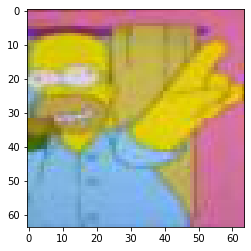

In [5]:
path = os.path.join(homer, np.random.choice(os.listdir(homer)))
img = plt.imread(path)
plt.imshow(img)

In [6]:
flower_data = []
flower_label =[]

In [7]:
for i in os.listdir(flower):
  path = os.path.join(flower, i)
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path, j))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.asarray(img)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    pixels -= 0.5
    pixels *= 2
    img = resize(pixels, (64,64))
    flower_data.append(img)
    flower_label.append(i)
    imsave(os.path.join(path, j), img)

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9921568632125854, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 0.9686274528503418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to s

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9843137264251709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9921568632125854, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9921568632125854, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to s

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9843137264251709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9843137264251709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9843137264251709, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior

Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9764705896377563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9921568632125854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this wa

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy co

Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9843137264251709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0, 0.9764705896377563]. Convert image to uint8 prior to saving to s

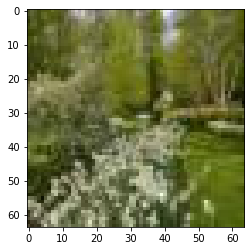

In [8]:
path = os.path.join(flower, np.random.choice(os.listdir(flower)))
path = os.path.join(path, np.random.choice(os.listdir(path)))
img = plt.imread(path)
plt.imshow(img)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
homer_data = np.array(homer_data)
homer_label = np.array(homer_label)
flower_data = np.array(flower_data)
flower_label = np.array(flower_label)

In [11]:
train_data, test_data, train_label, test_label = train_test_split(homer_data, homer_label, test_size=0.2)

In [12]:
print('Training set size:', np.shape(train_data))
print('Training labels size:', np.shape(train_label))
print('Test set size:', np.shape(test_data))
print('Test labels size:',np.shape(test_label))

Training set size: (1796, 64, 64, 3)
Training labels size: (1796,)
Test set size: (450, 64, 64, 3)
Test labels size: (450,)


In [13]:
train_data, valid_data, train_label, valid_label = train_test_split(train_data, train_label, test_size=0.25)

In [14]:
print('Shape of the training set', np.shape(train_data))
print('Shape of the testing set:', np.shape(test_data))
print('Shape of the validation set', np.shape(valid_data))

Shape of the training set (1347, 64, 64, 3)
Shape of the testing set: (450, 64, 64, 3)
Shape of the validation set (449, 64, 64, 3)


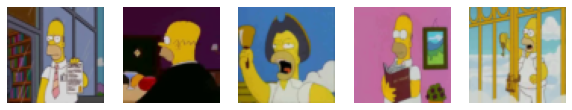

In [15]:
# Randomly select some training examples
selected = np.random.choice(len(train_data), 5)

plt.figure(figsize=(10., 10.))
for i, ind in enumerate(selected):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_data[ind]/2+0.5)
  plt.axis('off')

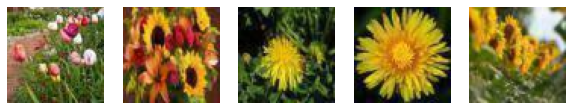

In [16]:
# Randomly select some flowers examples
selected = np.random.choice(len(flower_data), 5)

plt.figure(figsize=(10., 10.))
for i, ind in enumerate(selected):
  plt.subplot(1, 5, i+1)
  plt.imshow(flower_data[ind]/2+0.5)
  plt.axis('off')

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.



In [17]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
data_gen_args = dict(featurewise_center=False, 
featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1,
height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)

seed=0
batch_size=128

datagen = ImageDataGenerator(**data_gen_args)

In [19]:
image_generator = datagen.flow(
        train_data,
        batch_size=batch_size,
        seed=seed)

label_generator = datagen.flow(
        train_data,
        batch_size=batch_size,
        seed=seed)

train_generator = zip(image_generator,label_generator)

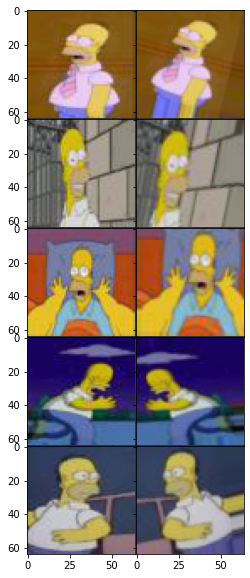

In [152]:
pairs = next(train_generator)
plt.figure(figsize = (10, 10))
for i in range(5):
    plt.subplot(5, 2, i + 1)
    plt.imshow(train_data[i] / 2 + 0.5)
    plt.subplot(5, 2, i + 6)
    plt.imshow(pairs[1][i] / 2 + 0.5)

## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [21]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [22]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu',input_shape=(64, 64, 3), padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Reshape(target_shape=(256,64)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Reshape(target_shape=(16, 16, 256)))
model.add(Conv2DTranspose(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=3,kernel_size=(3, 3), activation='relu', padding='same'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the validation dataset, then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

In [26]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(1e-4), loss = "mae", metrics = "mse")

In [27]:
history = model.fit(train_generator, steps_per_epoch = round(train_data.shape[0] / 128), epochs = 200,
    verbose = 1, validation_data = (valid_data, valid_data), validation_batch_size = 128)

Epoch 1/200
11/11 [==============================] - 79s 7s/step - loss: 0.4160 - mse: 0.2471 - val_loss: 0.4274 - val_mse: 0.2582
Epoch 2/200
11/11 [==============================] - 56s 5s/step - loss: 0.4150 - mse: 0.2458 - val_loss: 0.4260 - val_mse: 0.2567
Epoch 3/200
11/11 [==============================] - 51s 5s/step - loss: 0.4086 - mse: 0.2402 - val_loss: 0.4126 - val_mse: 0.2446
Epoch 4/200
11/11 [==============================] - 52s 5s/step - loss: 0.3876 - mse: 0.2256 - val_loss: 0.3946 - val_mse: 0.2331
Epoch 5/200
11/11 [==============================] - 50s 5s/step - loss: 0.3773 - mse: 0.2187 - val_loss: 0.3884 - val_mse: 0.2306
Epoch 6/200
11/11 [==============================] - 50s 5s/step - loss: 0.3747 - mse: 0.2190 - val_loss: 0.3865 - val_mse: 0.2301
Epoch 7/200
11/11 [==============================] - 51s 5s/step - loss: 0.3726 - mse: 0.2174 - val_loss: 0.3851 - val_mse: 0.2293
Epoch 8/200
11/11 [==============================] - 52s 5s/step - loss: 0.3736 - m

Epoch 125/200
11/11 [==============================] - 50s 5s/step - loss: 0.3538 - mse: 0.2094 - val_loss: 0.3707 - val_mse: 0.2237
Epoch 126/200
11/11 [==============================] - 74s 7s/step - loss: 0.3587 - mse: 0.2141 - val_loss: 0.3700 - val_mse: 0.2237
Epoch 127/200
11/11 [==============================] - 64s 6s/step - loss: 0.3569 - mse: 0.2125 - val_loss: 0.3700 - val_mse: 0.2237
Epoch 128/200
11/11 [==============================] - 47s 4s/step - loss: 0.3587 - mse: 0.2139 - val_loss: 0.3704 - val_mse: 0.2237
Epoch 129/200
11/11 [==============================] - 48s 4s/step - loss: 0.3540 - mse: 0.2100 - val_loss: 0.3699 - val_mse: 0.2237
Epoch 130/200
11/11 [==============================] - 59s 5s/step - loss: 0.3592 - mse: 0.2145 - val_loss: 0.3701 - val_mse: 0.2237
Epoch 131/200
11/11 [==============================] - 55s 5s/step - loss: 0.3563 - mse: 0.2122 - val_loss: 0.3699 - val_mse: 0.2236
Epoch 132/200
11/11 [==============================] - 54s 5s/step - 

Classification threshold: 0.3760062344053522


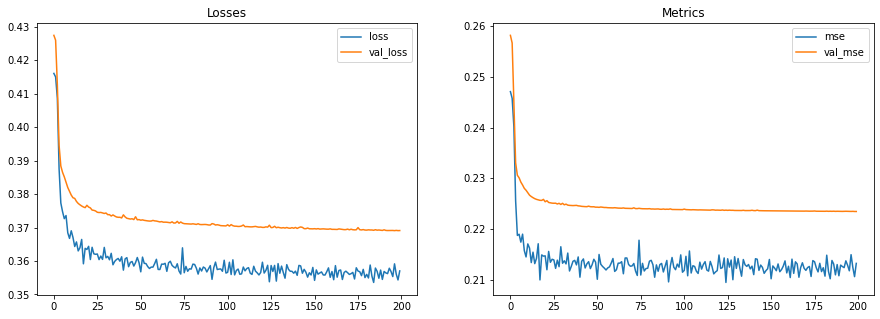

In [48]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title("Losses")
plt.plot(np.arange(200), history.history["loss"], np.arange(200), history.history["val_loss"])
plt.legend(labels = ("loss", "val_loss"))

plt.subplot(1, 2, 2)
plt.title("Metrics")
plt.plot(np.arange(200), history.history["mse"], np.arange(200), history.history["val_mse"])
plt.legend(labels = ("mse", "val_mse"))

a = np.array(history.history["val_loss"])
th = np.mean(a) + 0.5 * np.std(a)
print(f"Classification threshold: {th}")

In [30]:
test_data = np.asarray(test_data)
test_label = np.asarray(test_label)

In [57]:
results = model.evaluate( x = test_data, y = test_data, batch_size = batch_size, verbose = 1)
print(f"Loss: {results[0]}, Mse: {results[1]}\n")

4/4 [==============================] - 3s 685ms/step - loss: 0.3626 - mse: 0.2165
Loss: 0.36260178685188293, Mse: 0.2165244221687317



In [49]:
def predict_and_scale(array):
    pred = model.predict(array, batch_size = batch_size, verbose = 1)
    corr = np.copy(pred)
    for i in range(corr.shape[0]):
        corr[i] /= 255
        corr[i] -= 0.5
        corr[i] *= 2
    return pred, corr

pred, corr = predict_and_scale(test_data)

4/4 [==============================] - 3s 737ms/step


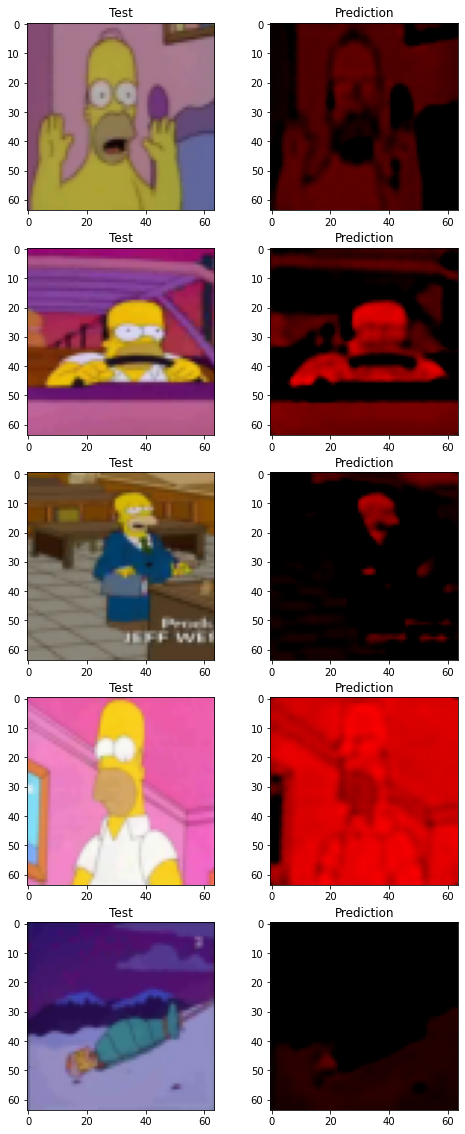

In [69]:
R = np.random.randint(test_data.shape[0], size = 5)
plt.figure(figsize = (8, 20))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.title("Test")
    plt.imshow(test_data[R[i]] / 2 + 0.5)
    plt.subplot(5, 2, 2 * i + 2)
    plt.title("Prediction")
    plt.imshow(pred[R[i]])

In [70]:
ratio = 0
for i in range(test_data.shape[0]):
    if np.mean(np.abs(test_data[i] - pred[i])) < th:
        ratio += 1
ratio /= test_data.shape[0]
print(f"Recognized {np.round(ratio * 100, 2)}% of the images.")

Recognized 64.0% of the images.


In [72]:
results2 = model.evaluate( x = flower_data, y = flower_data, batch_size = batch_size, verbose = 1)
print(f"Loss: {results2[0]}, Mse: {results2[1]}\n")

34/34 [==============================] - 45s 1s/step - loss: 0.4461 - mse: 0.2963
Loss: 0.44607943296432495, Mse: 0.29629719257354736



In [71]:
pred2, corr2 = predict_and_scale(flower_data)
ratio2 = 0
for i in range(flower_data.shape[0]):
    if np.mean(np.abs(flower_data[i] - pred2[i])) < th:
        ratio2 += 1
ratio2 /= flower_data.shape[0]
print(f"Recognized {np.round(ratio2 * 100, 2)}% of the images.")

34/34 [==============================] - 38s 1s/step
Recognized 29.45% of the images.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


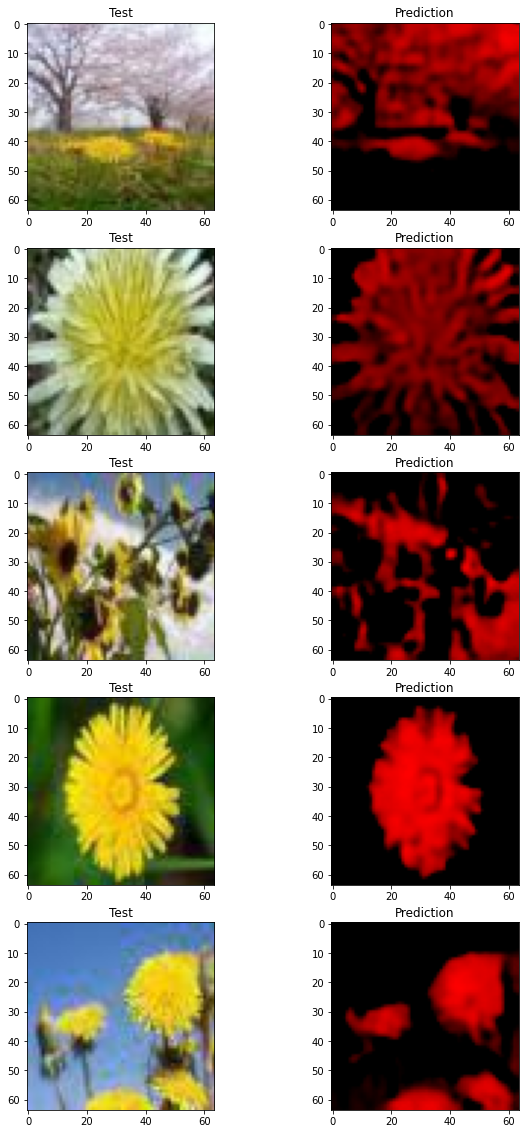

In [63]:
R = np.random.randint(flower_data.shape[0], size = 5)
plt.figure(figsize = (10, 20))
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.title("Test")
    plt.imshow(flower_data[R[i]] / 2 + 0.5)
    plt.subplot(5, 2, 2 * i + 2)
    plt.title("Prediction")
    plt.imshow(pred2[R[i]])